# Analysis of Dynamic PIE Simulations

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import fretbursts as frb
import phconvert as phc
import H2MM_C as h2
import burstH2MM as bhm

# Get custom functions
sys.path.append(os.path.abspath("../../../"))
import code_repo

%config InlineBackend.figure_format='retina'

 - Optimized (cython) burst search loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.8.2).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------



        The current file lacks the alternation period definition.
        You will need to manually add this info using:

          d.add(D_ON=D_ON, A_ON=A_ON)

        where `d` is a Data object and D_ON/A_ON is a tuple with start/stop
        values defining the D/A excitation excitation period. Values are in
        raw timestamps units.
        


# Total photons (after ALEX selection):     4,150,005
#  D  photons in D+A excitation periods:    1,854,162
#  A  photons in D+A excitation periods:    2,295,843
# D+A photons in  D  excitation period:     2,051,627
# D+A photons in  A  excitation period:     2,098,378

 - Calculating BG rates ... get bg th arrays
Channel 0
[DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
 - - - - - CHANNEL  1 - - - - 
 --> END Fused 4887 bursts (32.9%, 11 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]
<class 'matplotlib.figure.Figure'>
<class 'matplotlib.figure.Figure'>


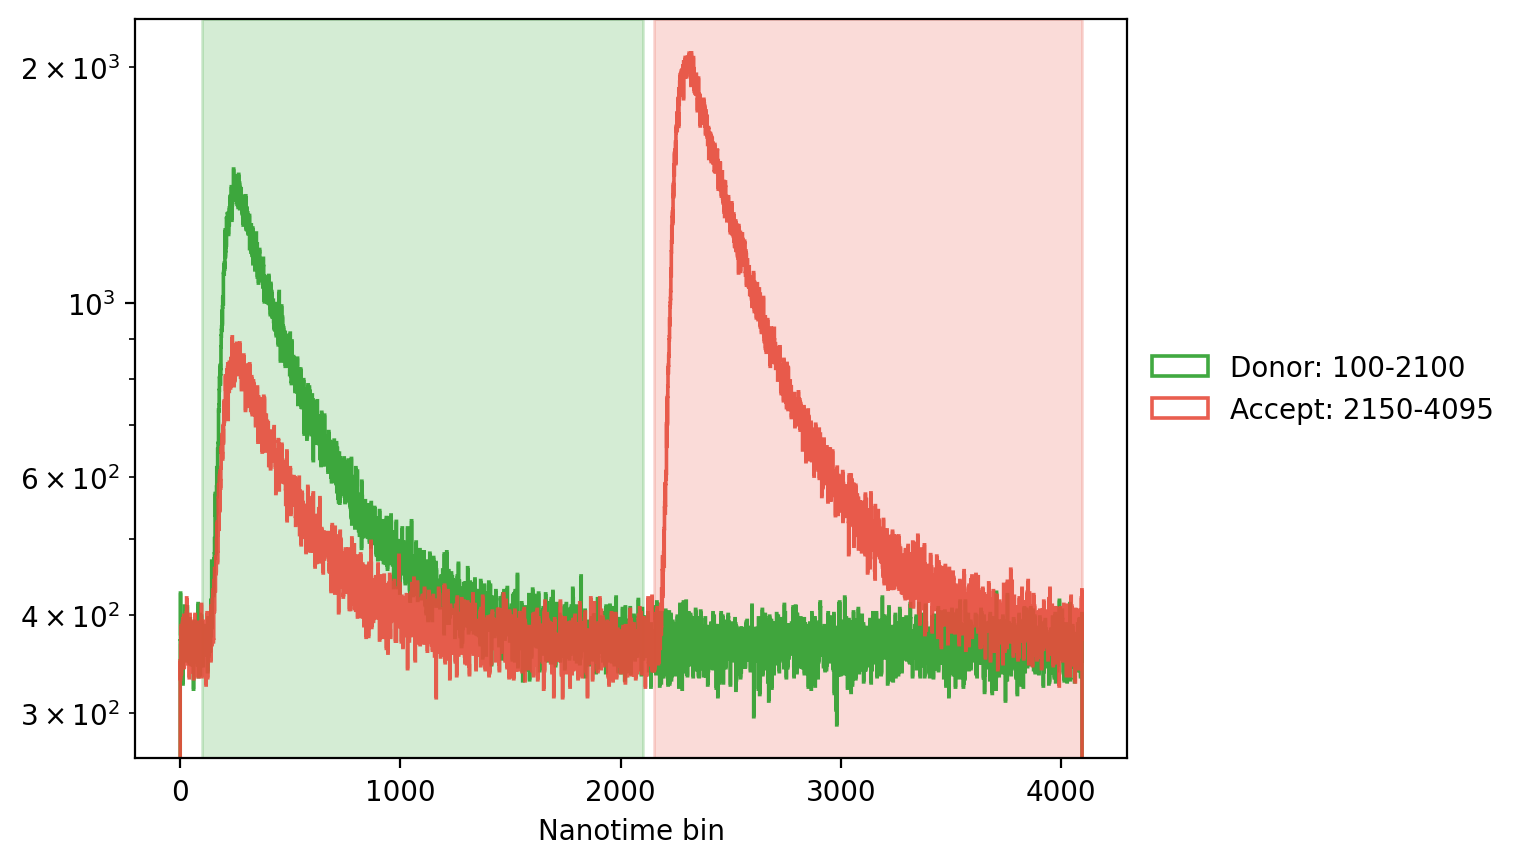

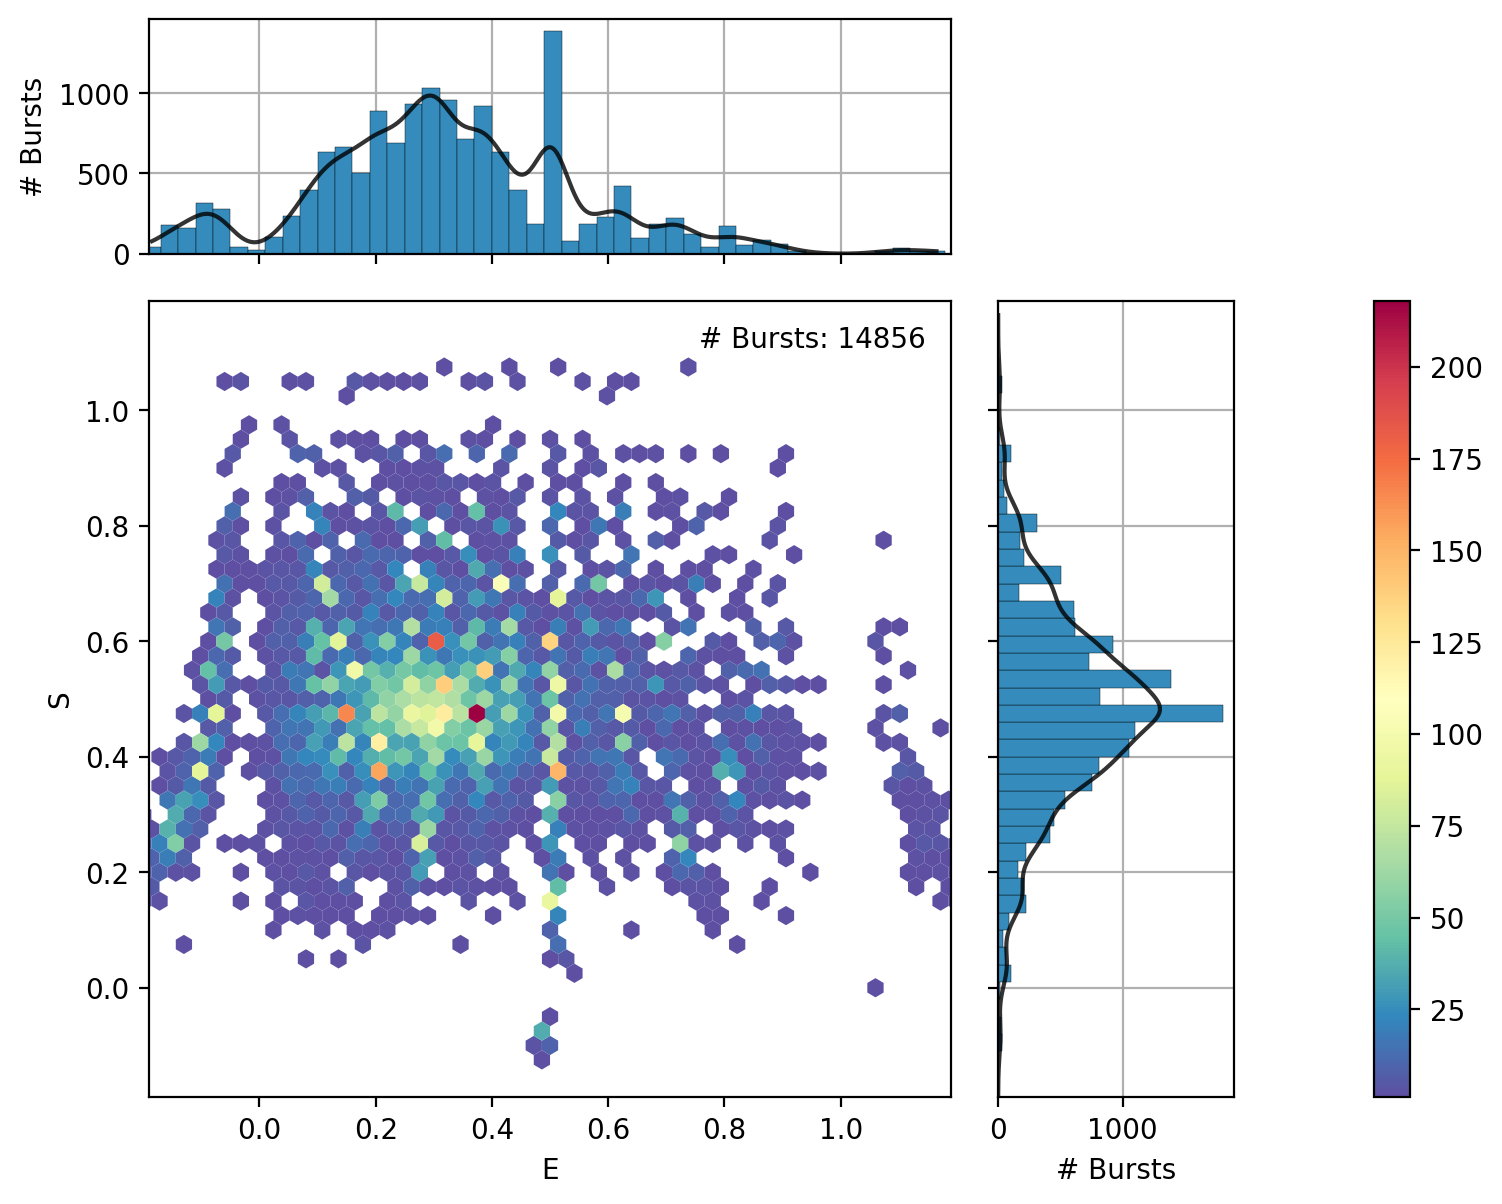

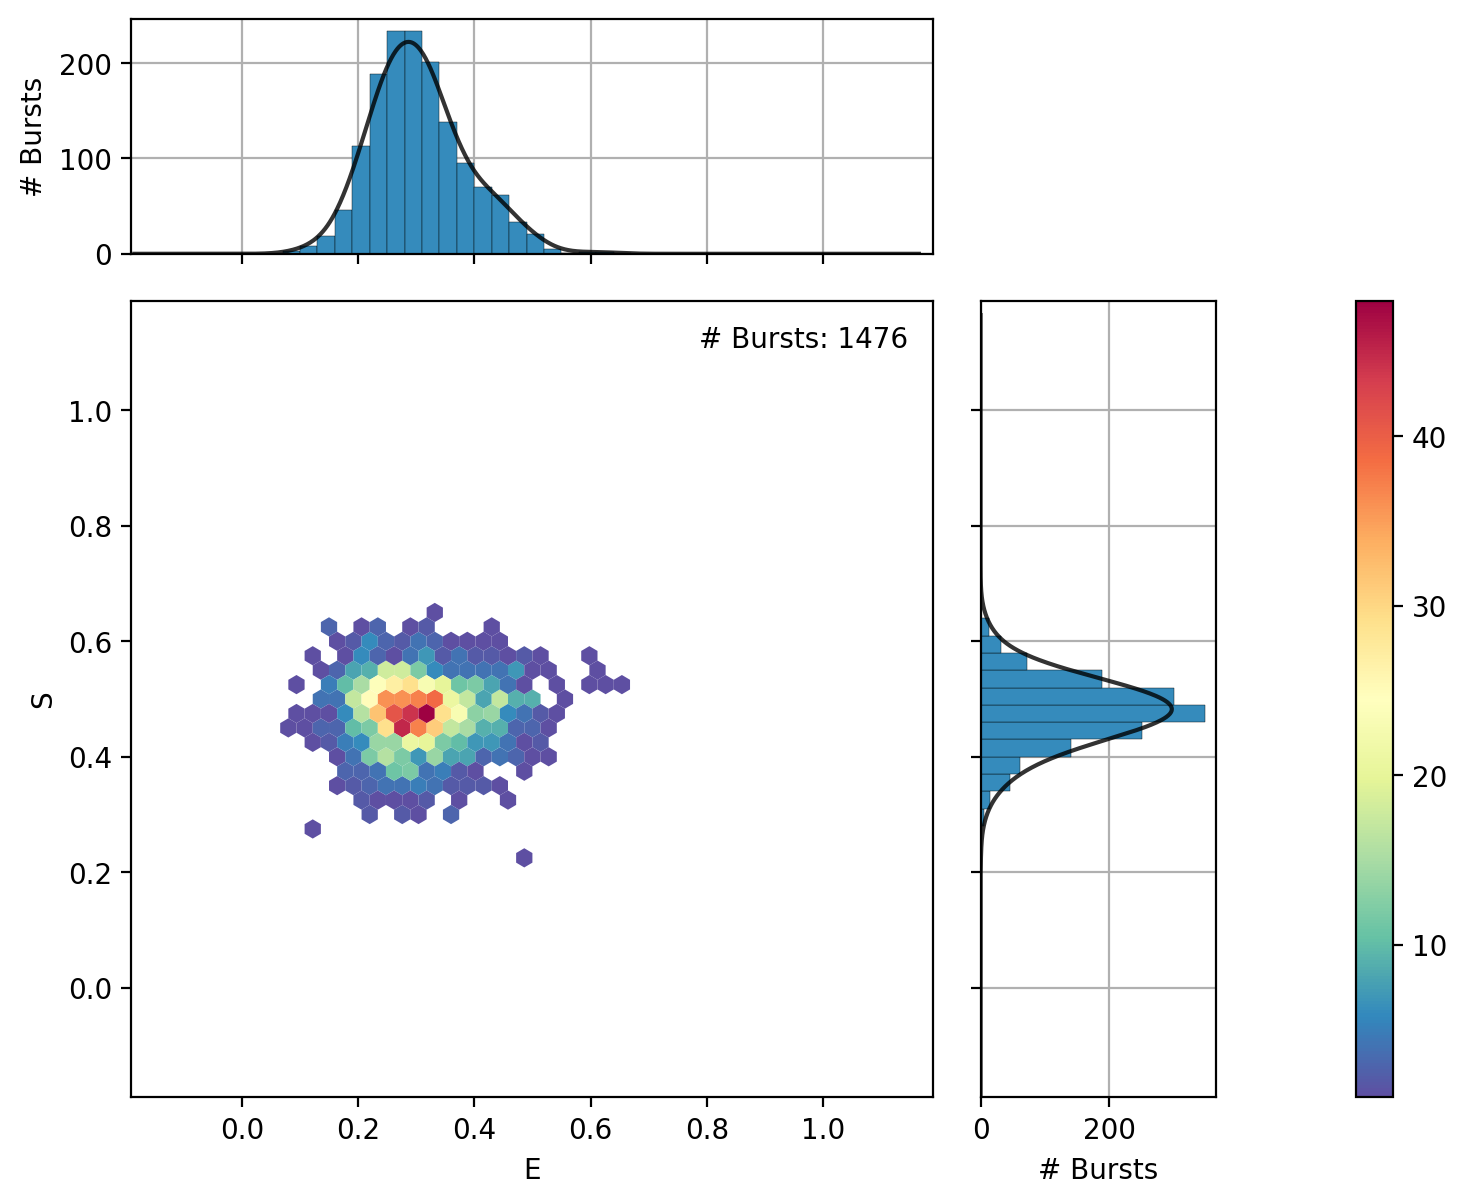

In [2]:
d = frb.loader.photon_hdf5(
        "smFRET_aa3ff9_E30E50_2states_taus_2.5ms1.0ms0.0ms_blink_0.5ms3.0ms1.0ms.h5"
)
d.add(D_ON=(100, 2100), A_ON=(2150, 4095))
#d.add(D_ON=(4, 7), A_ON=(0, 3))
frb.plot_alternation_hist(d)
frb.loader.alex_apply_period(d)

d.calc_bg(fun=frb.bg.exp_fit, time_s = 60, F_bg=1.7)
d.burst_search(F=7, m = 10)
d.fuse_bursts(ms = 0)

ds = d.select_bursts(frb.select_bursts.size, add_naa = False, th1=60)
ds = ds.select_bursts(frb.select_bursts.naa, th1=40)

frb.alex_jointplot(d);
frb.alex_jointplot(ds);

<class 'matplotlib.figure.Figure'>


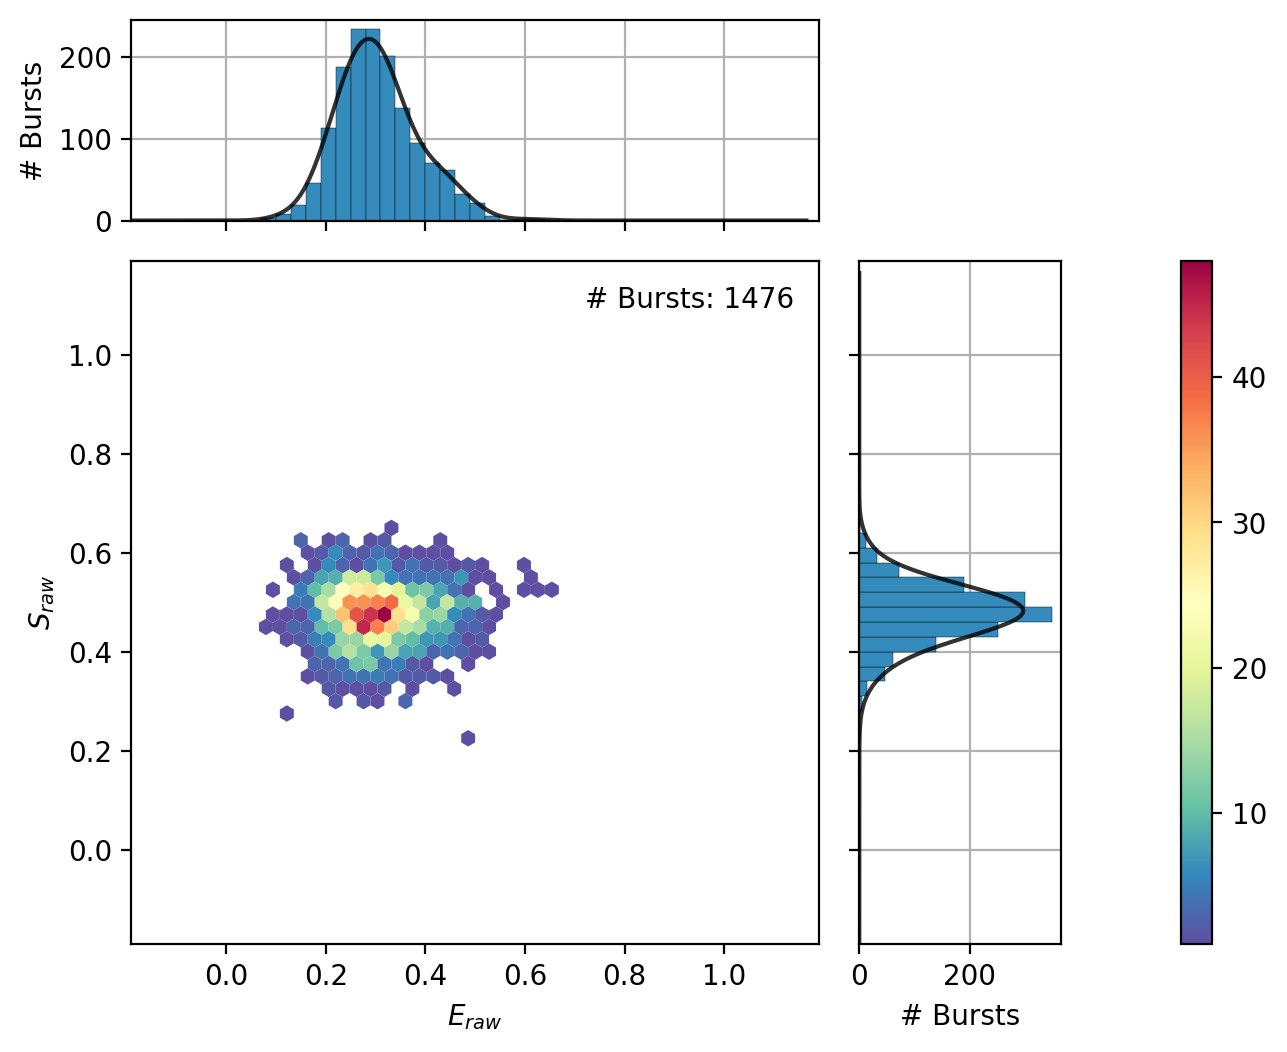

In [3]:
plot = frb.alex_jointplot(ds)
plot.set_size_inches(6, 6)
plot.axes[0].set_xlabel(r"$E_{raw}$")
plot.axes[0].set_ylabel(r"$S_{raw}$")
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_ES_severeblinking.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_ES_severeblinking.svg", bbox_inches = 'tight')

Average burst duration in ms: 2.1432750677506776


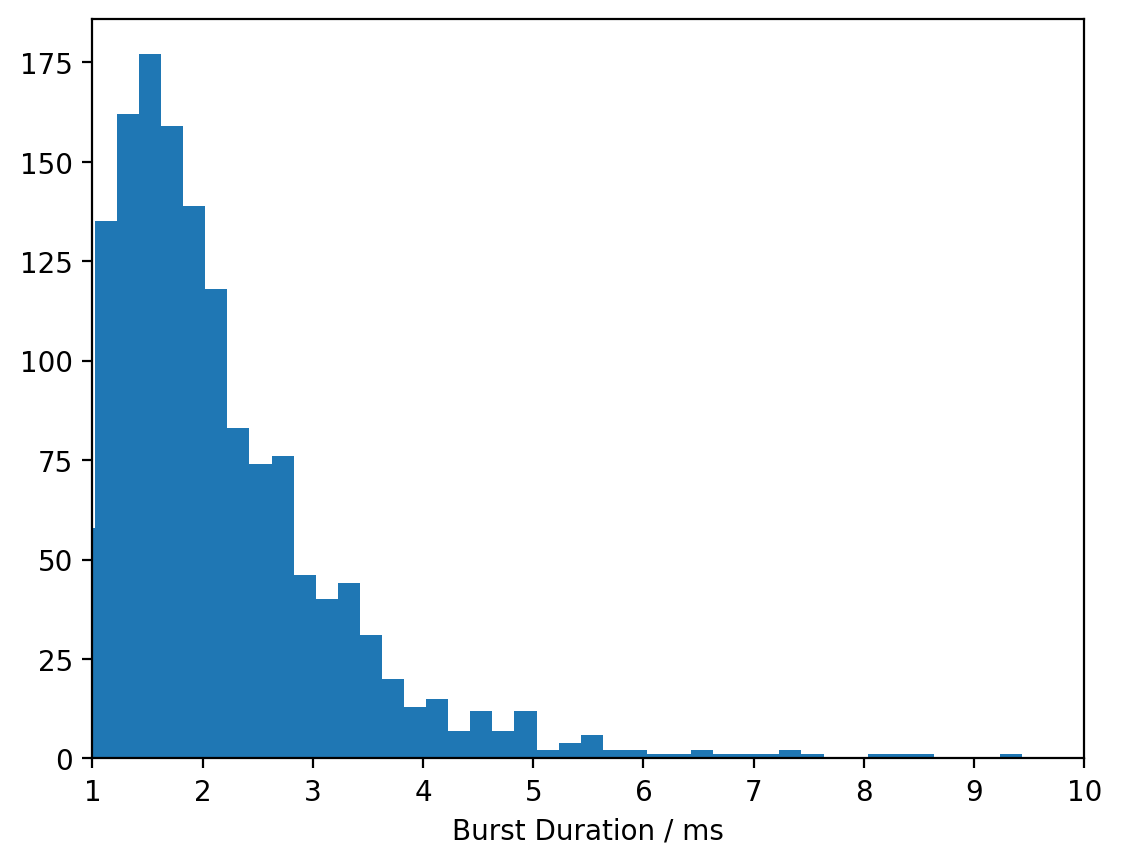

Total number of bursts / s: 2.9712


In [4]:
bur_dur = ds.burst_widths[0]
print(f"Average burst duration in ms: {np.mean(bur_dur)*1000}")

plt.hist(bur_dur * 1000, bins = 50)
#plt.xscale("log")
plt.xlim(1, 10)
plt.xlabel("Burst Duration / ms")
plt.show()

num_bursts_total = d.E[0].shape[0]
num_bursts_filtered = ds.E[0].shape[0]

print(f"Total number of bursts / s: {num_bursts_total/(d.acquisition_duration)}")

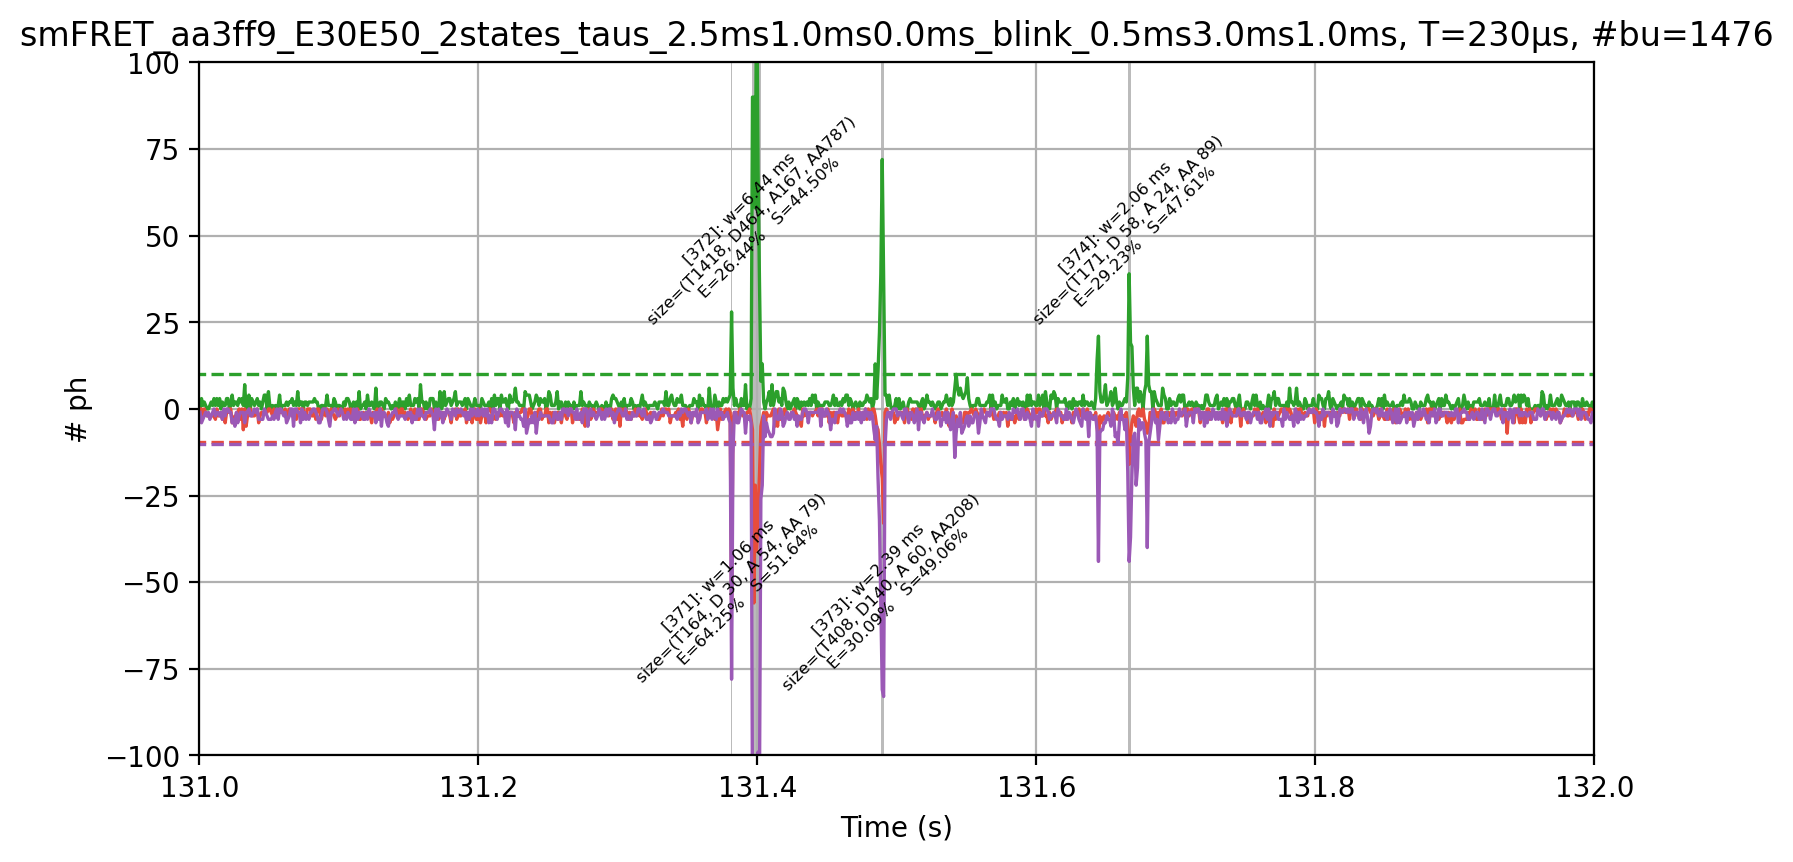

In [5]:
t_trace = 131
frb.dplot(ds, frb.timetrace, tmin=t_trace, tmax=t_trace+1, bursts=True);

In [6]:
mp = bhm.BurstData(ds)

In [7]:
mp.models.calc_models(to_state=6, max_iter = 1200)

The model converged after 1 iterations

The model converged after 72 iterations

The model converged after 85 iterations

The model converged after 210 iterations

Optimization reached maximum number of iterations

Optimization reached maximum number of iterations

3

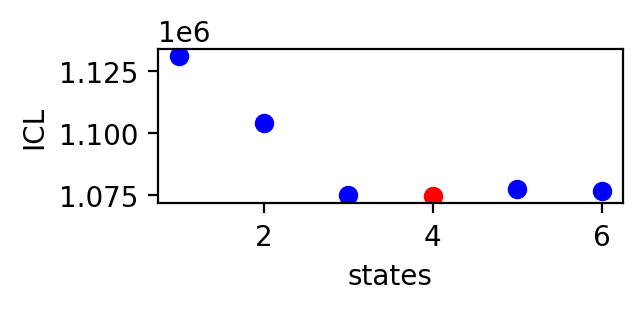

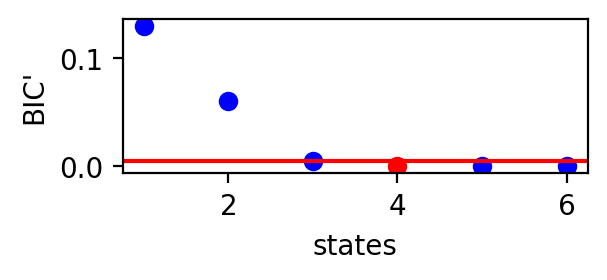

In [12]:
plt.figure(figsize=(3, 1))
mp.models.find_ideal('ICL', auto_set=True)
bhm.ICL_plot(mp.models, highlight_ideal=True)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,2))
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_2state_h2mm_severeblinking_icl.png", dpi = 600, bbox_inches = 'tight')
plt.show()

plt.figure(figsize=(3, 1))
mp.models.find_ideal('BICp', auto_set=False)
bhm.BICp_plot(mp.models, highlight_ideal=True)
plt.axhline(0.005, c = "r")
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_2state_h2mm_severeblinking_bic.png", dpi = 600, bbox_inches = 'tight')
plt.show()

## Two-State Model

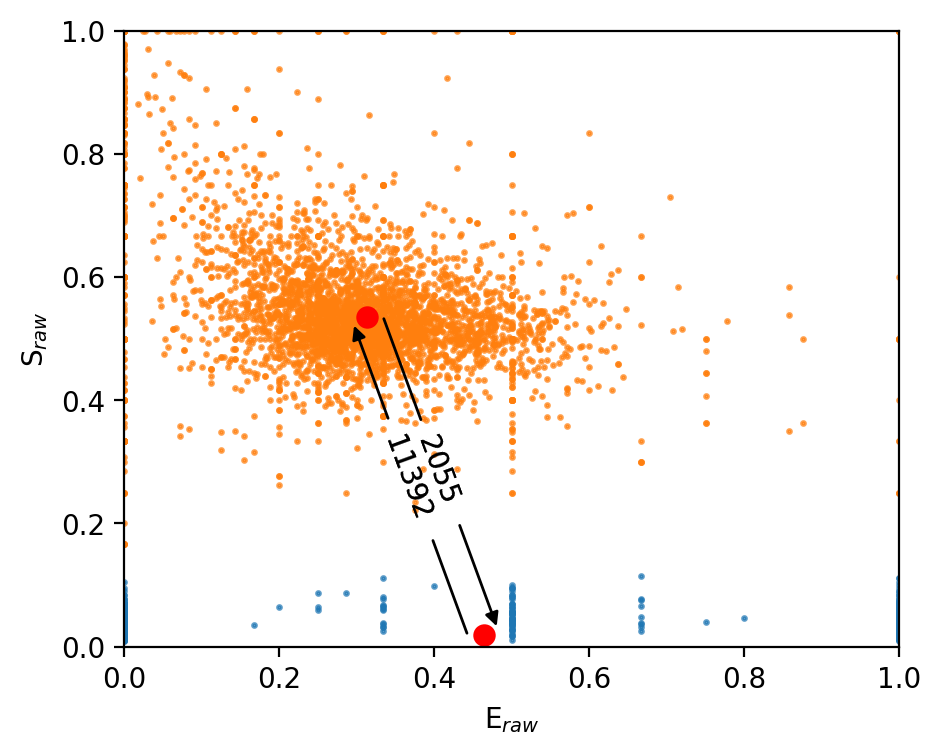

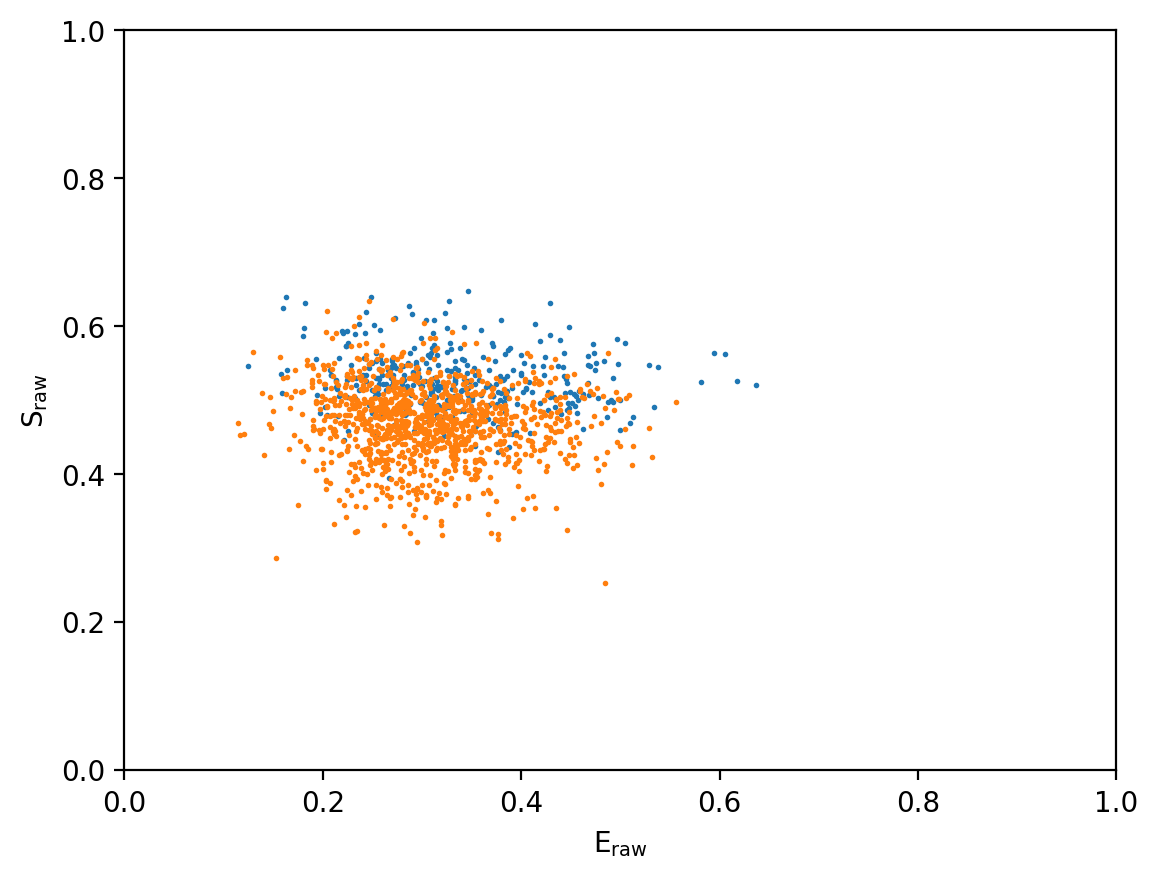

/opt/miniconda3/envs/h2mm/lib/python3.12/site-packages/burstH2MM/BurstSort.py:1836: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  style_frame[f'to_state_{t}'][f'state_{f}'] = 'background-color: lightcoral'


,E_raw,S_raw,to_state_0,to_state_1
state_0,0.463582,0.018952,19988608.121902,11391.878098
state_1,0.312939,0.535226,2054.962477,19997945.037523


In [13]:
model_id = 1
fig, ax= plt.subplots(figsize=(5,4))
bhm.dwell_ES_scatter(mp.models[model_id], s = 2)
bhm.trans_arrow_ES(mp.models[model_id], min_rate = 1)
#bhm.axline_E(mp.models[model_id])
bhm.scatter_ES(mp.models[model_id], s = 50, color = "r")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_2state_h2mm_severeblinking.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_2state_h2mm_severeblinking.svg", bbox_inches = 'tight')
plt.show()
plt.show()

bhm.burst_ES_scatter(mp.models[model_id], flatten_dynamics=False, s = 1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

mp.models[model_id]

## Three-State Model

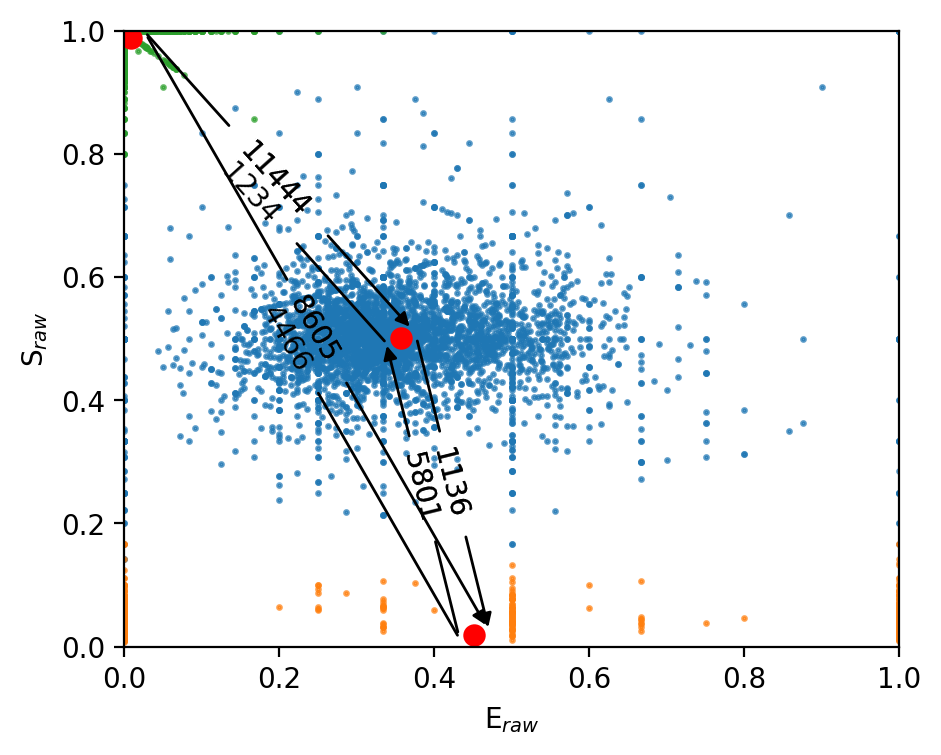

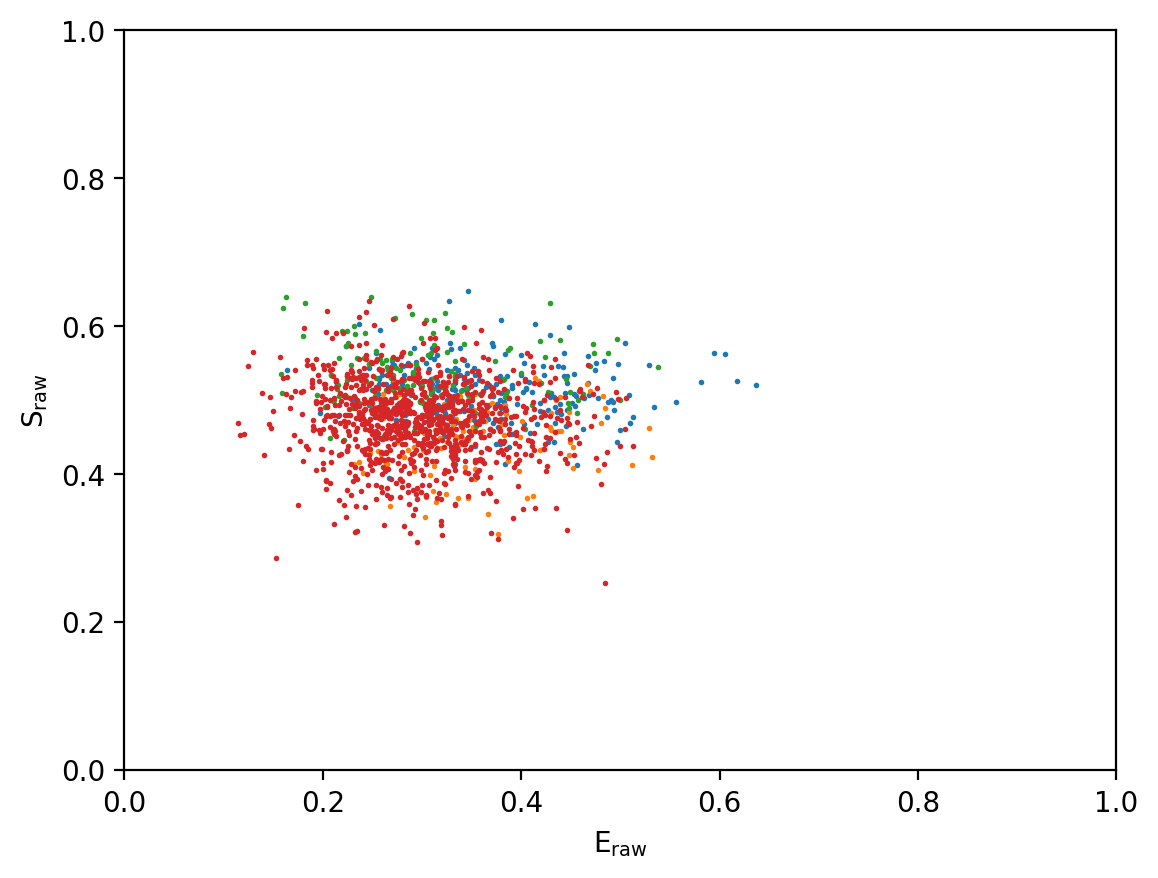

/opt/miniconda3/envs/h2mm/lib/python3.12/site-packages/burstH2MM/BurstSort.py:1836: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  style_frame[f'to_state_{t}'][f'state_{f}'] = 'background-color: lightcoral'


,E_raw,S_raw,to_state_0,to_state_1,to_state_2
state_0,0.356506,0.501112,19997629.655969,1136.364172,1233.979859
state_1,0.451464,0.018954,5801.424344,19989732.283232,4466.292424
state_2,0.008369,0.988575,11444.029260,8605.241965,19979950.728775


In [14]:
model_id = 2
fig, ax= plt.subplots(figsize=(5, 4))
bhm.dwell_ES_scatter(mp.models[model_id], s = 2)
bhm.trans_arrow_ES(mp.models[model_id], min_rate = 1)
#bhm.axline_E(mp.models[model_id])
bhm.scatter_ES(mp.models[model_id], s = 50, color = "r")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_3state_h2mm_severeblinking.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_3state_h2mm_severeblinking.svg", bbox_inches = 'tight')
plt.show()
plt.show()

bhm.burst_ES_scatter(mp.models[model_id], flatten_dynamics=False, s = 1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

mp.models[model_id]

## Four-State Model

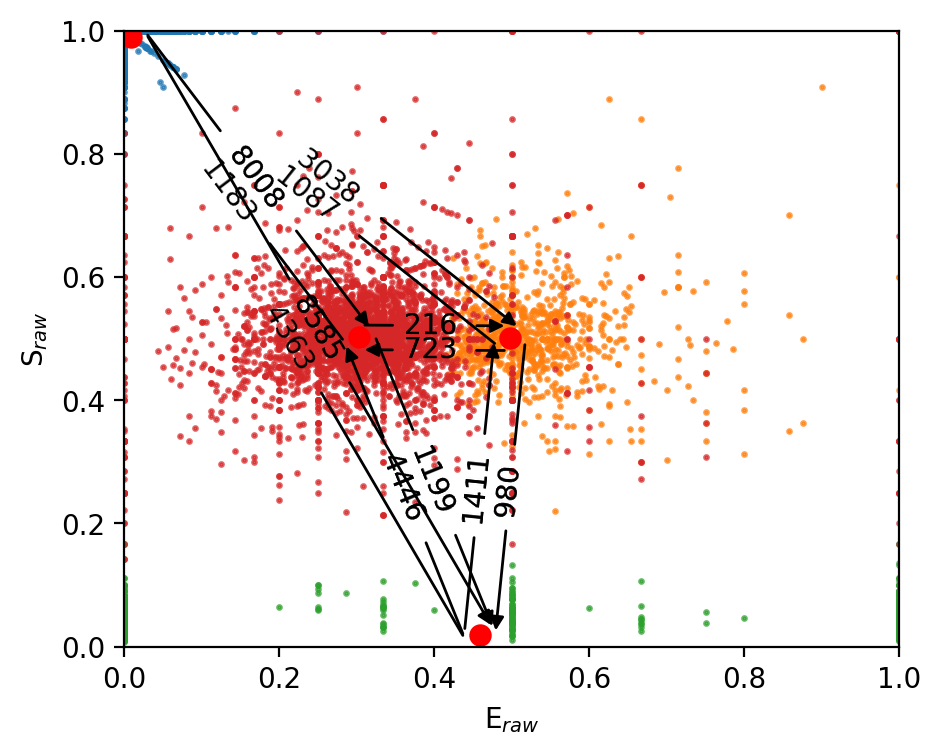

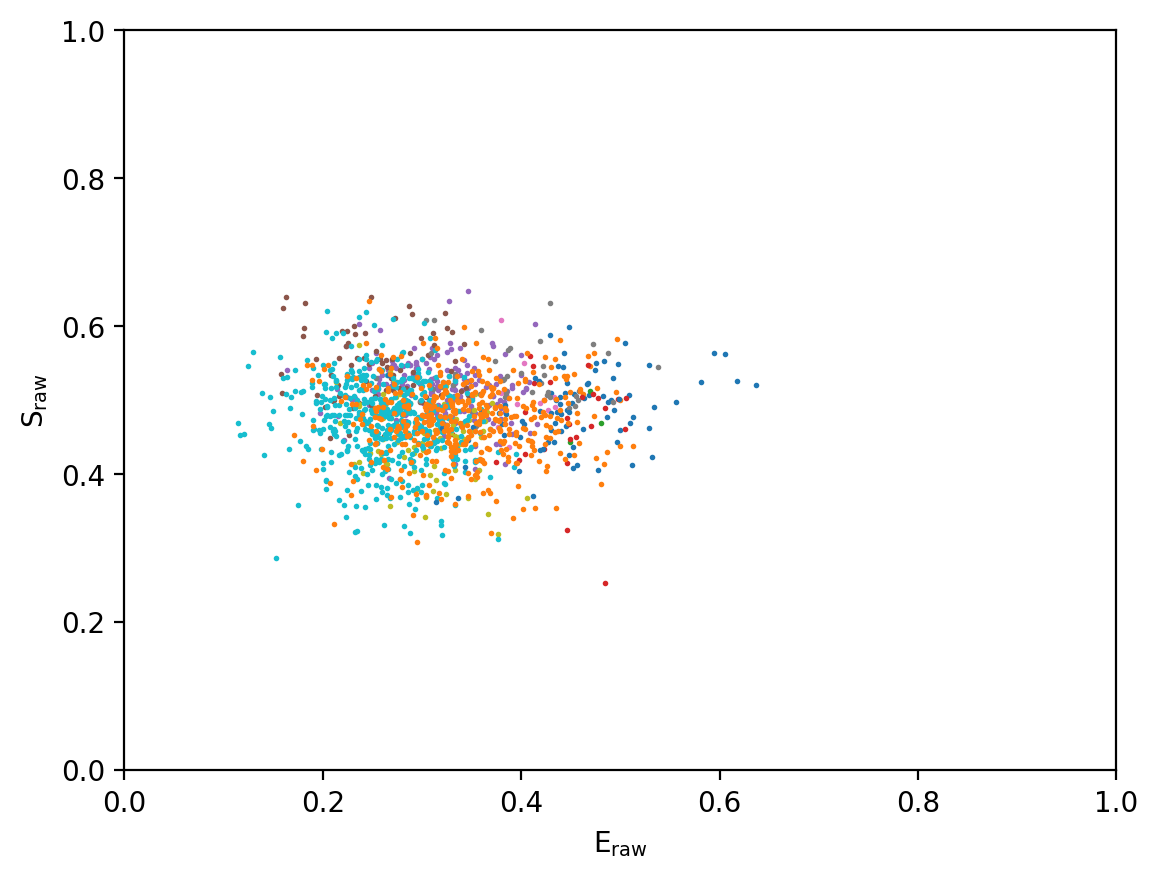

/opt/miniconda3/envs/h2mm/lib/python3.12/site-packages/burstH2MM/BurstSort.py:1836: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  style_frame[f'to_state_{t}'][f'state_{f}'] = 'background-color: lightcoral'


,E_raw,S_raw,to_state_0,to_state_1,to_state_2,to_state_3
state_0,0.008450,0.989616,19980367.911352,3038.275171,8585.476221,8008.337257
state_1,0.497438,0.500752,1087.252173,19997209.651930,980.182718,722.913178
state_2,0.458337,0.018852,4362.770758,1410.500212,19989781.108665,4445.620364
state_3,0.302825,0.501991,1183.046925,215.764384,1198.949701,19997402.238990


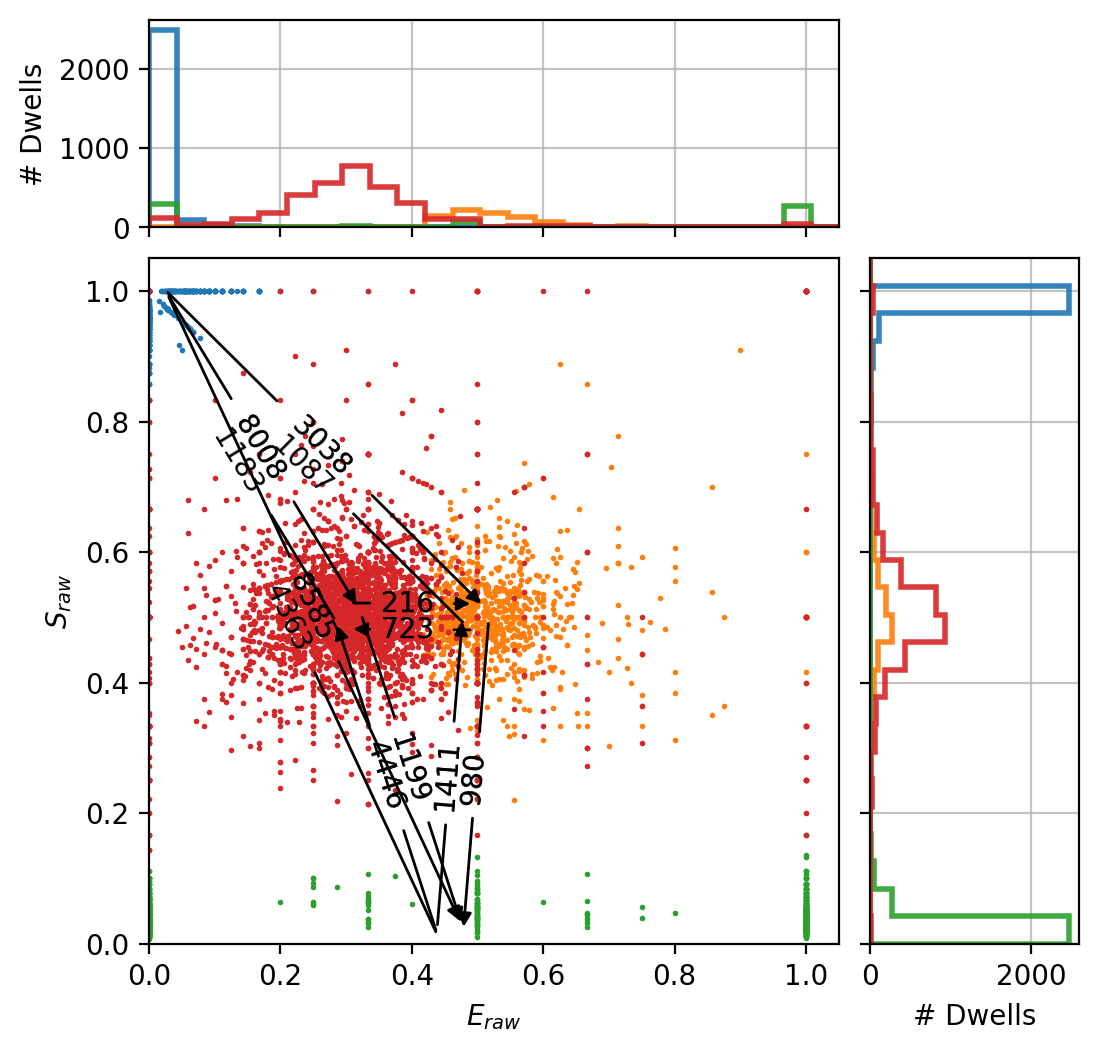

In [15]:
model_id = 3
fig, ax= plt.subplots(figsize=(5, 4))
bhm.dwell_ES_scatter(mp.models[model_id], s = 2)
bhm.trans_arrow_ES(mp.models[model_id], min_rate = 1)
#bhm.axline_E(mp.models[model_id])
bhm.scatter_ES(mp.models[model_id], s = 50, color = "r")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_4state_h2mm_severeblinking.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_4state_h2mm_severeblinking.svg", bbox_inches = 'tight')
plt.show()
plt.show()

bhm.burst_ES_scatter(mp.models[model_id], flatten_dynamics=False, s = 1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()



code_repo.dwell_ES_histprojection(mp.models[model_id], plot_ranges=[[0, 1.05], [0, 1.05]])
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_4state_h2mm_ES_scatter_hist_severeblinking.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_4state_h2mm_ES_scatter_hist_severeblinking.svg", bbox_inches = 'tight')

mp.models[model_id]

## Selecting from the Four-State Model, selecting the FRET-state 1 and 3

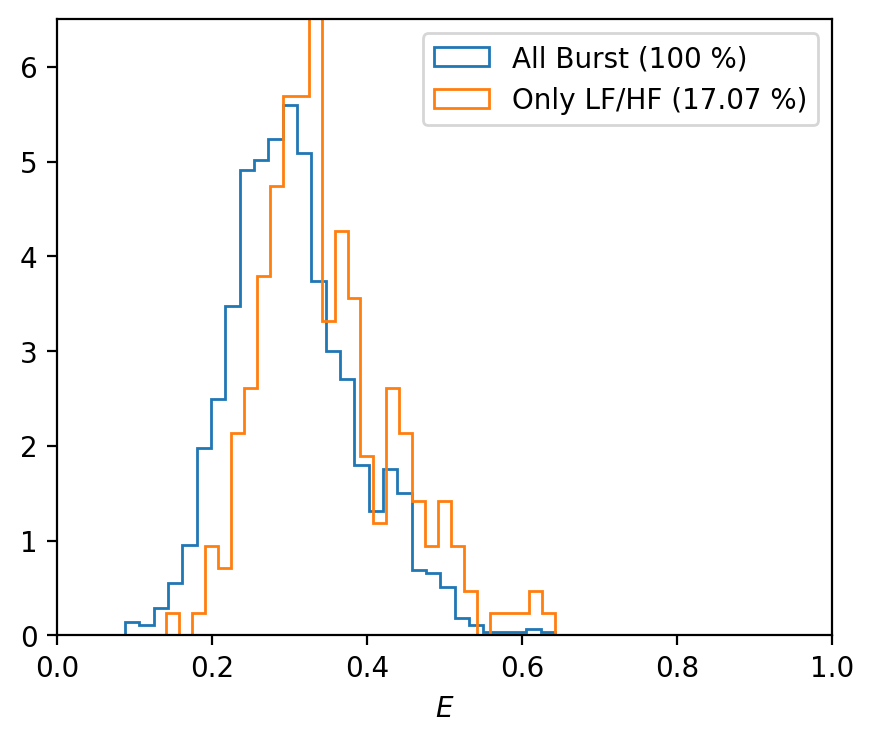

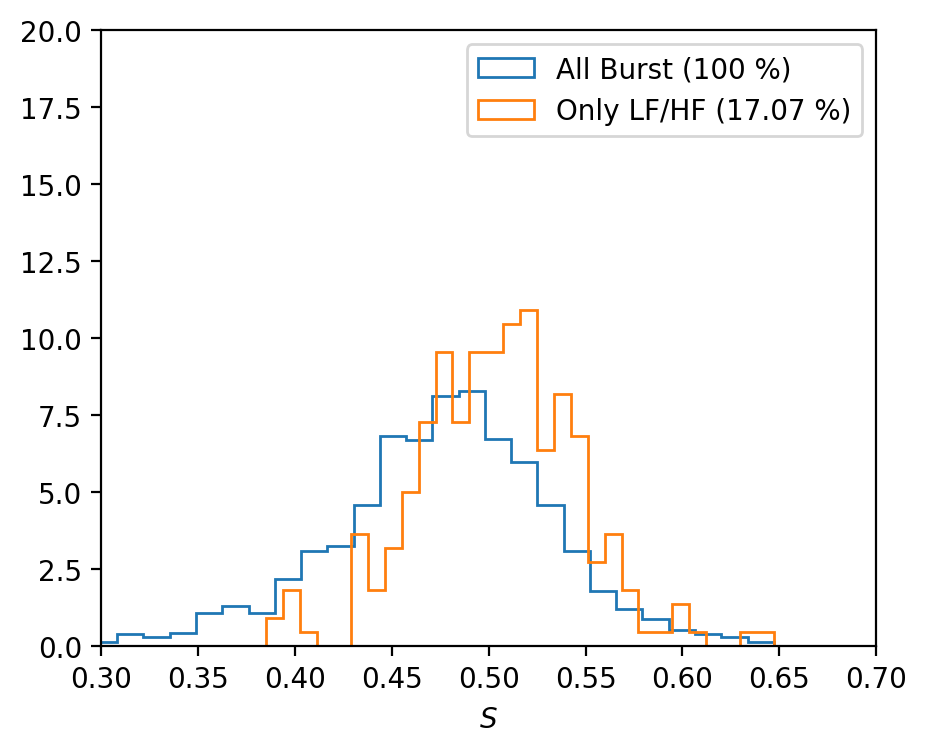

Selected 252 out of 1476 bursts: 17.073170731707318 %.


In [16]:
# Burst Purification Approach: see https://drive.google.com/file/d/1RlG_ELupM9DD4lyYAD4INpa_qjWib55X/view?usp=drive_link
# and 'exclusivity analysis' - see if a dwell contains mostly dynamic bursts

model_id = 3

total_bursts = len(ds.E[0])

# Selecting bursts that visited the LF or HF state but never a dye blinking state!
sel_idxs = code_repo.get_purification_mask(mp.models[model_id], select_states = [0b1010, 0b0010, 0b1000])


plt.subplots(figsize=(5, 4))
plt.hist(ds.E[0], bins = 30, alpha = 1.0, label = f"All Burst (100 %)", density=True, histtype=u'step')
plt.hist(ds.E[0][sel_idxs], bins = 30, alpha = 1.0, label = f"Only LF/HF ({round((len(ds.E[0][sel_idxs])/total_bursts) * 100, 2)} %)", density=True, histtype=u'step')
plt.legend(loc = "best")
plt.xlim(0, 1)
plt.ylim(0, 6.5)
plt.xlabel(r"$E$")
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_figure_burstpurification_E.svg")
plt.show()


plt.subplots(figsize=(5, 4))
plt.hist(ds.S[0], bins = 30, alpha = 1.0, label = f"All Burst (100 %)", density=True, histtype=u'step')
plt.hist(ds.S[0][sel_idxs], bins = 30, alpha = 1.0, label = f"Only LF/HF ({round((len(ds.E[0][sel_idxs])/total_bursts) * 100, 2)} %)", density=True, histtype=u'step')
plt.legend(loc = "best")
plt.xlim(0.3, 0.7)
plt.ylim(0, 20)
plt.xlabel(r"$S$")
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_figure_burstpurification_S.svg")
plt.show()



print(f'Selected {len(ds.E[0][sel_idxs])} out of {total_bursts} bursts: {len(ds.E[0][sel_idxs])/total_bursts * 100} %.')

<class 'matplotlib.figure.Figure'>


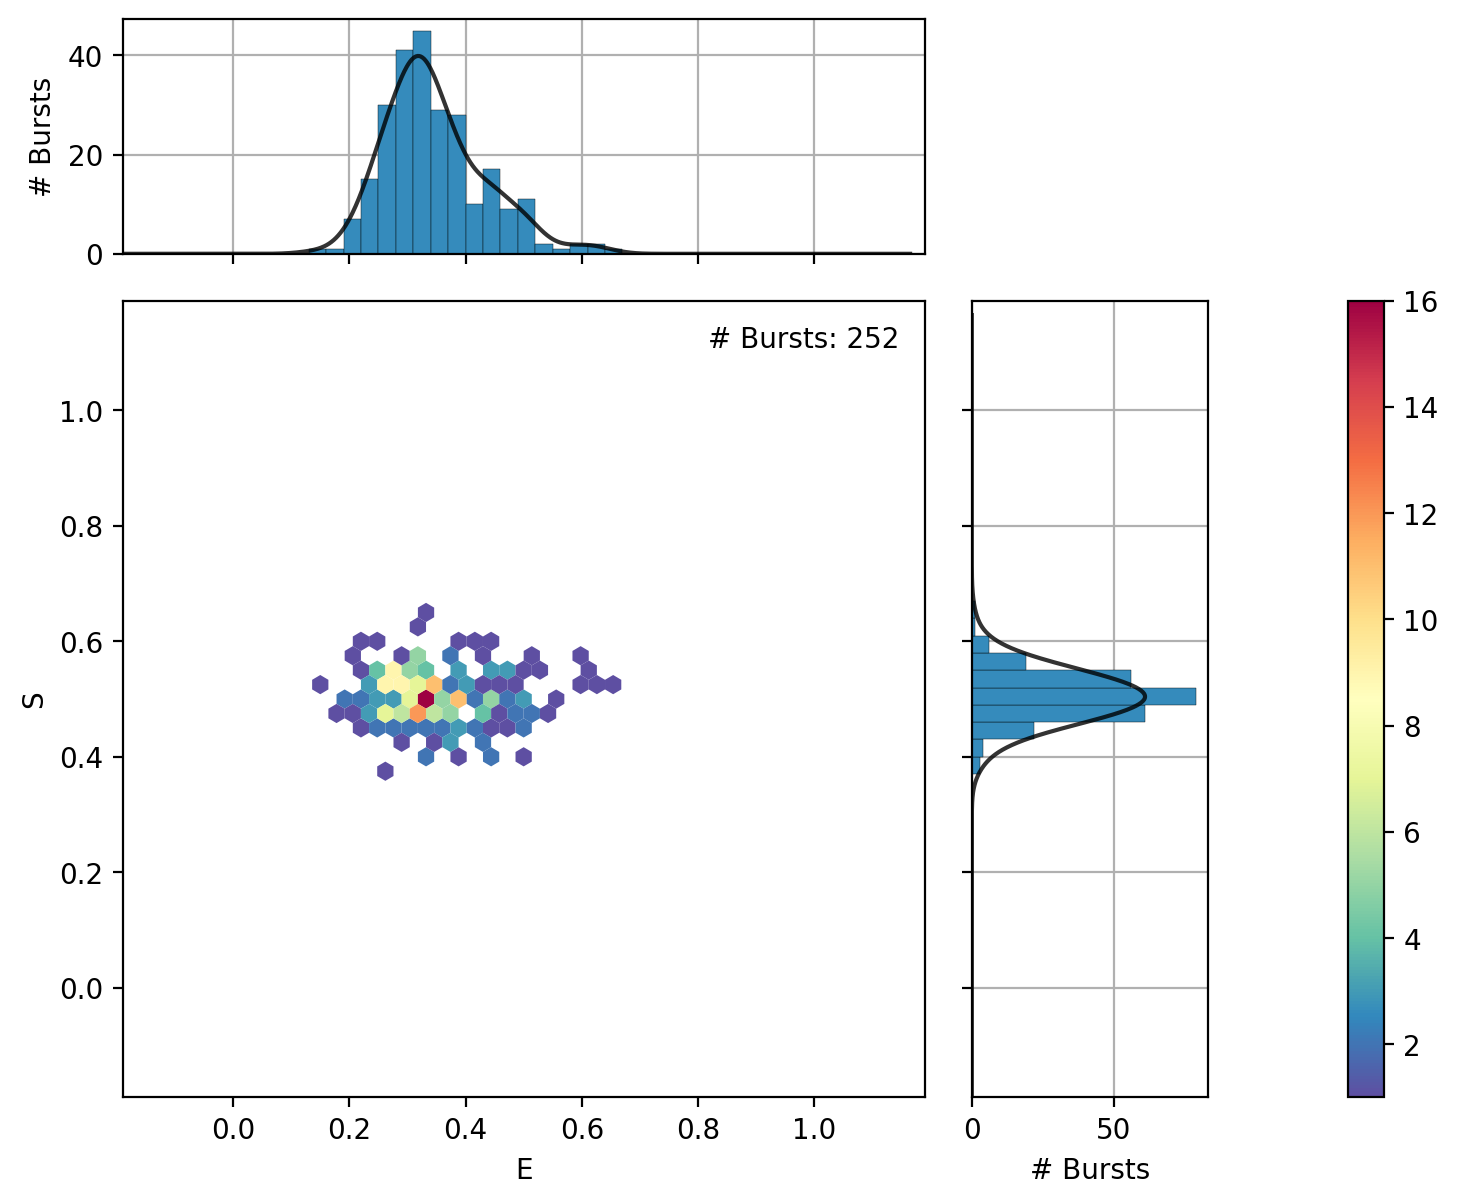

In [17]:
# Selecting bursts and make new fretbursts object
ds_sel = ds.select_bursts_mask_apply(sel_idxs)
plot.set_size_inches(6, 6)
frb.alex_jointplot(ds_sel);
plot.axes[0].set_xlabel(r"$E_{raw}$")
plot.axes[0].set_ylabel(r"$S_{raw}$")
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_ES_puri_severeblinking.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_ES_puri_severeblinking.svg", bbox_inches = 'tight')

In [18]:
mp_sel = bhm.BurstData(ds_sel)

mp_sel.models.calc_models(max_iter = 3600, to_state=5)

The model converged after 1 iterations

The model converged after 141 iterations

The model converged after 440 iterations

The model converged after 1165 iterations

An error occured on iteration 1584, returning previous model

0

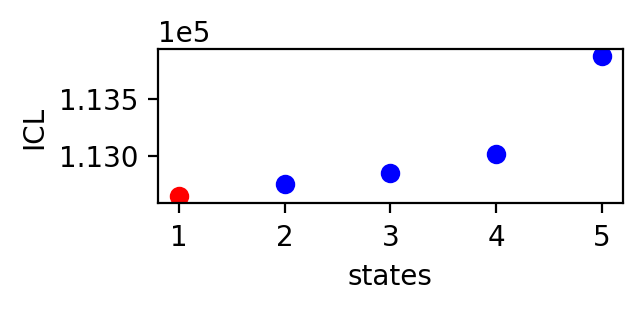

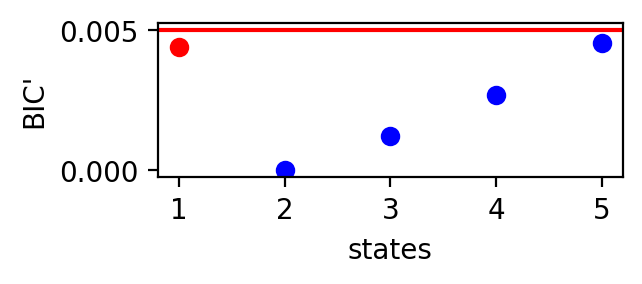

In [19]:
plt.figure(figsize=(3, 1))
mp_sel.models.find_ideal('ICL', auto_set=True)
bhm.ICL_plot(mp_sel.models, highlight_ideal=True)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,1))
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_2state_h2mm_puri_severeblinking_icl.png", dpi = 600, bbox_inches = 'tight')
plt.show()

plt.figure(figsize=(3, 1))
mp_sel.models.find_ideal('BICp', auto_set=False)
bhm.BICp_plot(mp_sel.models, highlight_ideal=True)
plt.axhline(0.005, c = "r")
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_2state_h2mm_puri_severeblinking_bic.png", dpi = 600, bbox_inches = 'tight')
plt.show()

In [20]:
mp_sel.models[1]

/opt/miniconda3/envs/h2mm/lib/python3.12/site-packages/burstH2MM/BurstSort.py:1836: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  style_frame[f'to_state_{t}'][f'state_{f}'] = 'background-color: lightcoral'


,E_raw,S_raw,to_state_0,to_state_1
state_0,0.495178,0.492345,19999005.374042,994.625958
state_1,0.312160,0.509890,308.392475,19999691.607525


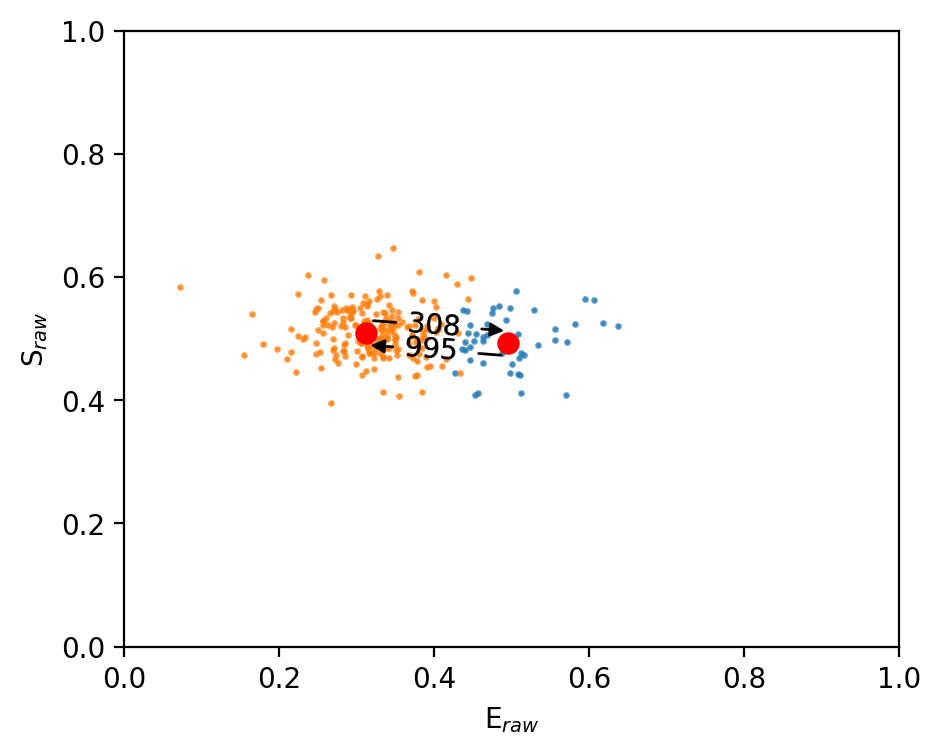

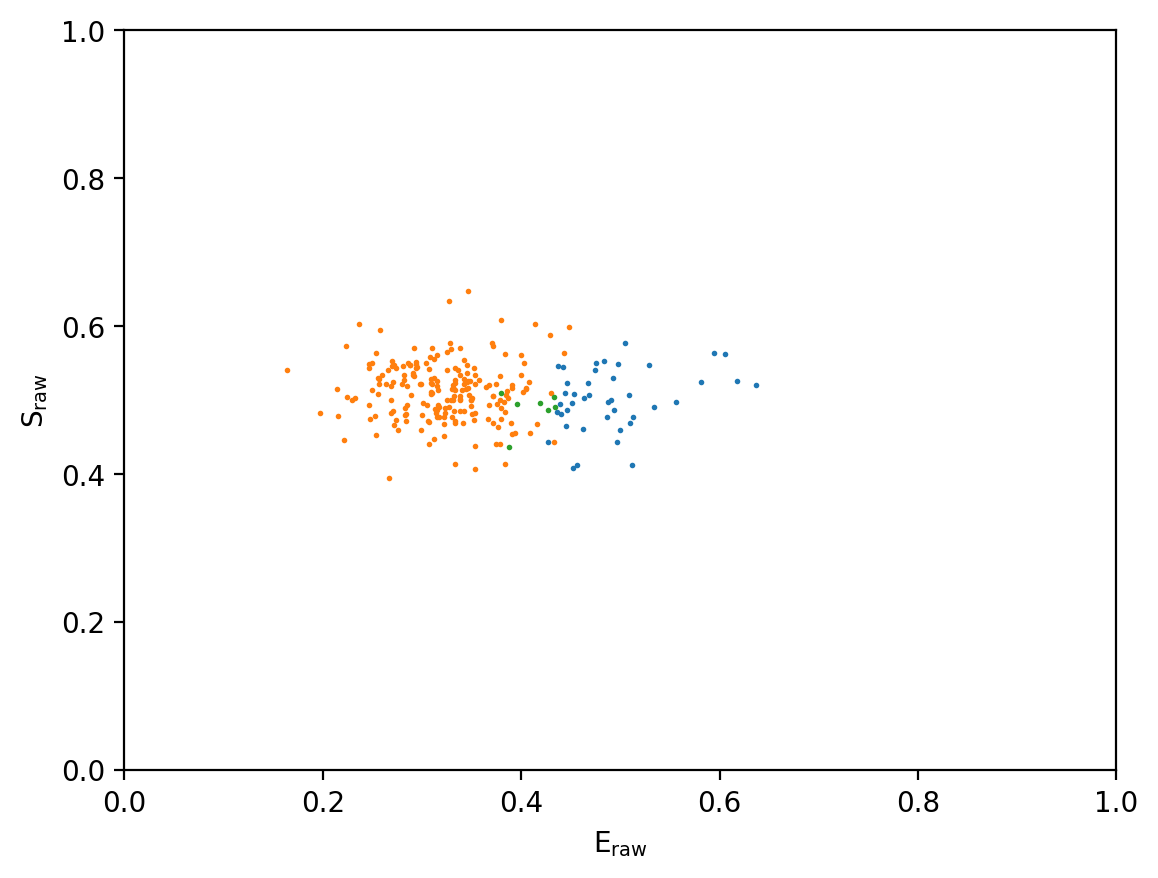

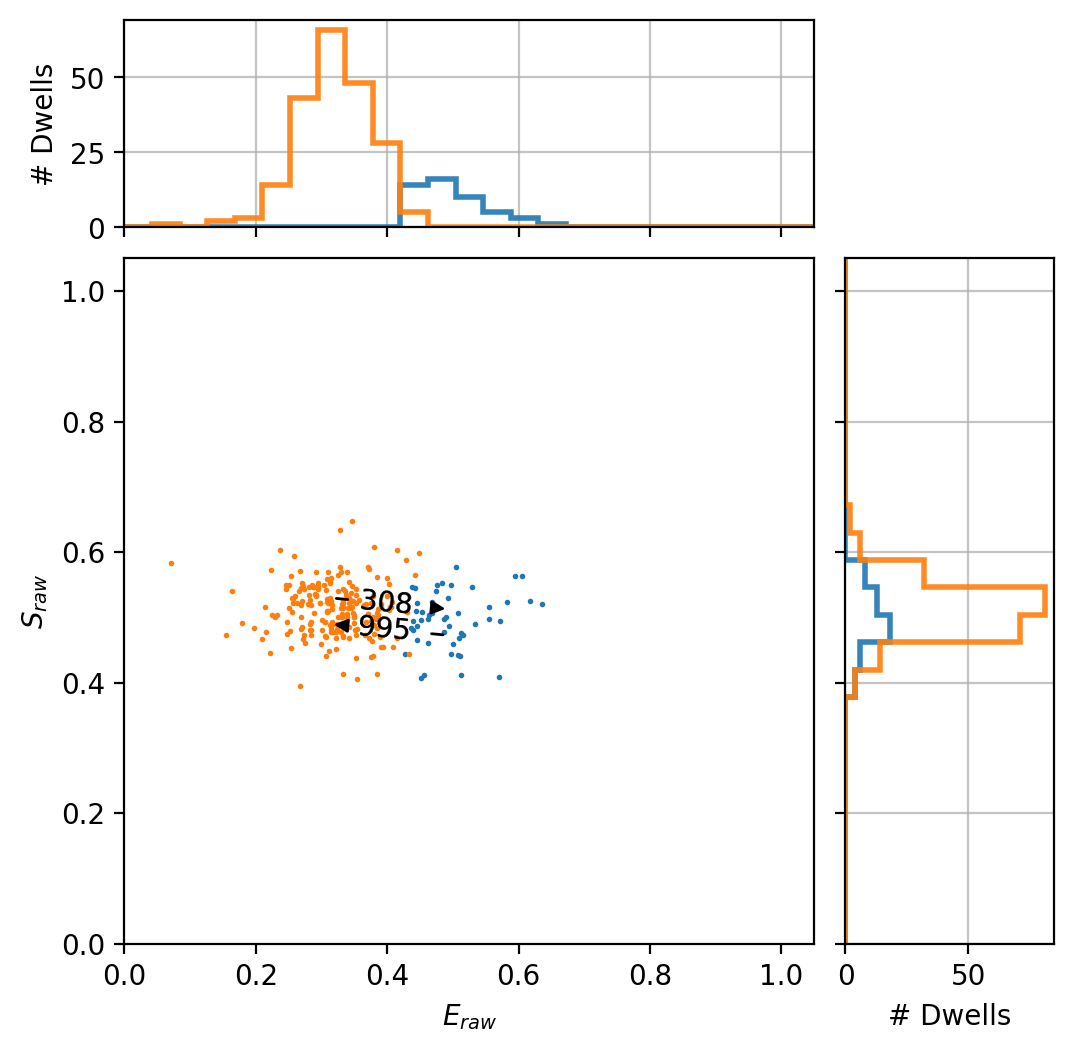

In [21]:
model_id = 1

fig, ax= plt.subplots(figsize=(5, 4))
bhm.dwell_ES_scatter(mp_sel.models[model_id], s = 2)
bhm.trans_arrow_ES(mp_sel.models[model_id], min_rate=0)
#bhm.axline_E(mp.models[model_id])
bhm.scatter_ES(mp_sel.models[model_id], s = 50, color = "r")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_2state_h2mm_puri_lightblinking.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_2state_h2mm_puri_lightblinking.svg", bbox_inches = 'tight')
plt.show()

bhm.burst_ES_scatter(mp_sel.models[model_id], flatten_dynamics=True, s = 1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()


code_repo.dwell_ES_histprojection(mp_sel.models[model_id], plot_ranges=[[0, 1.05], [0, 1.05]])
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_2state_puri_h2mm_ES_scatter_hist_severeblinking.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_2state_puri_h2mm_ES_scatter_hist_severeblinking.svg", bbox_inches = 'tight')



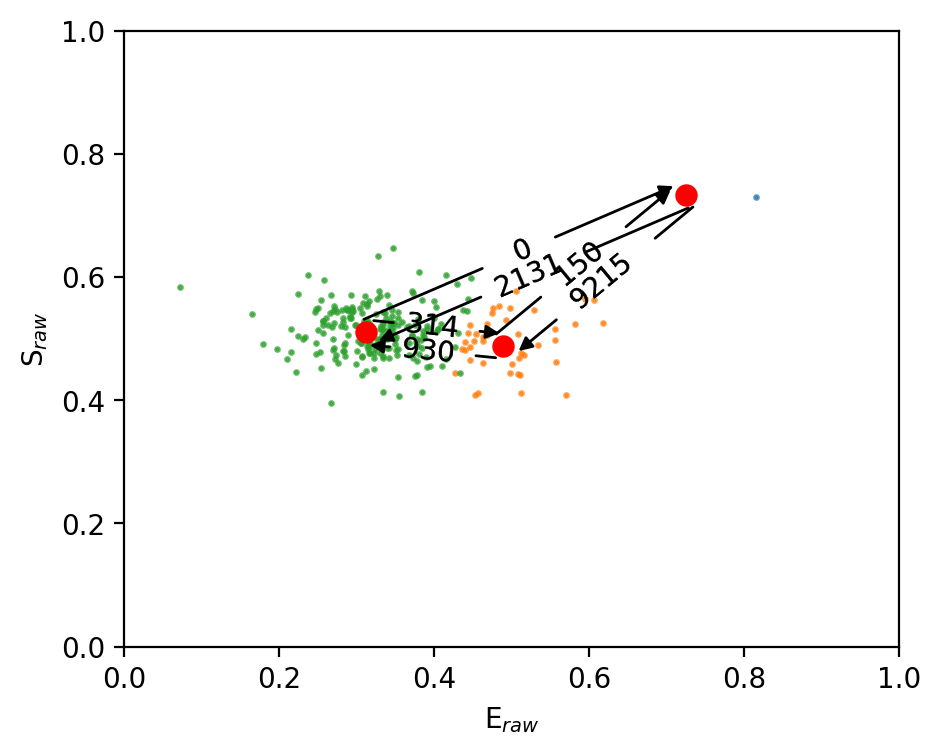

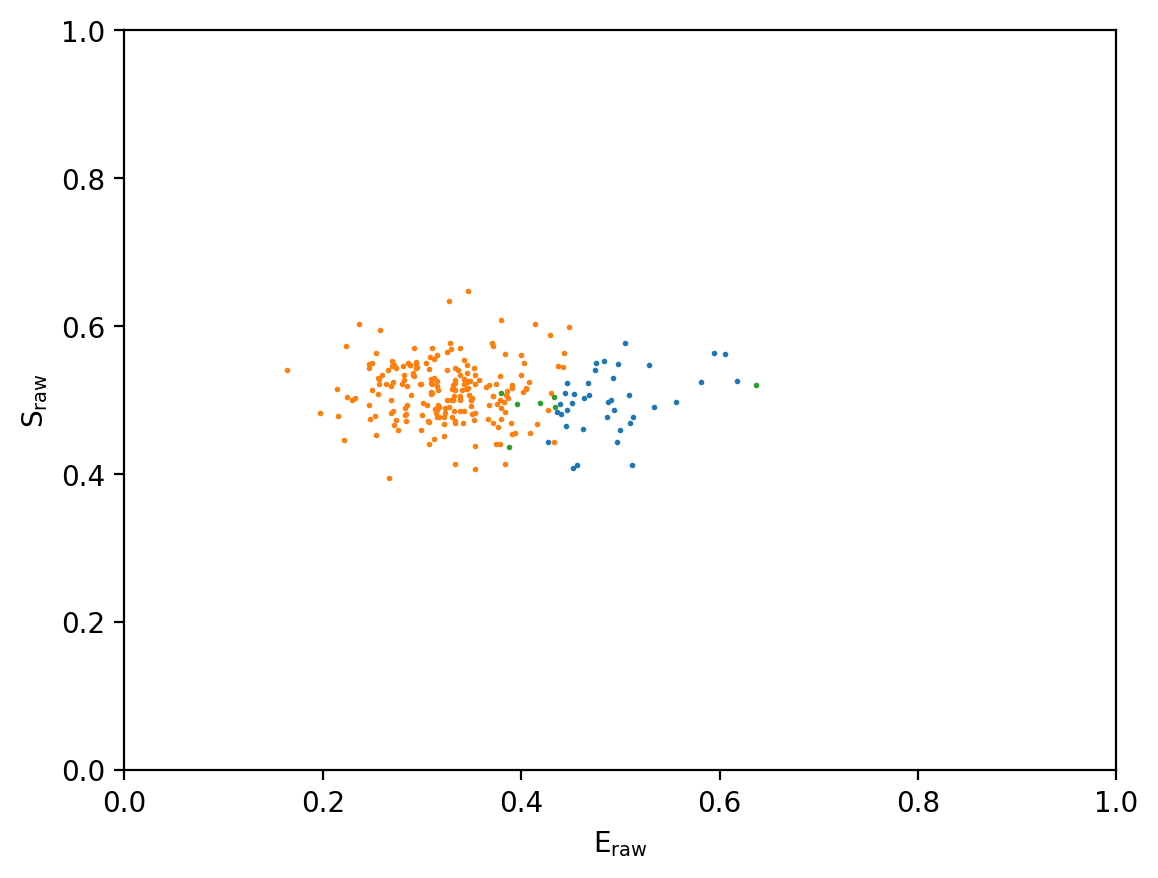

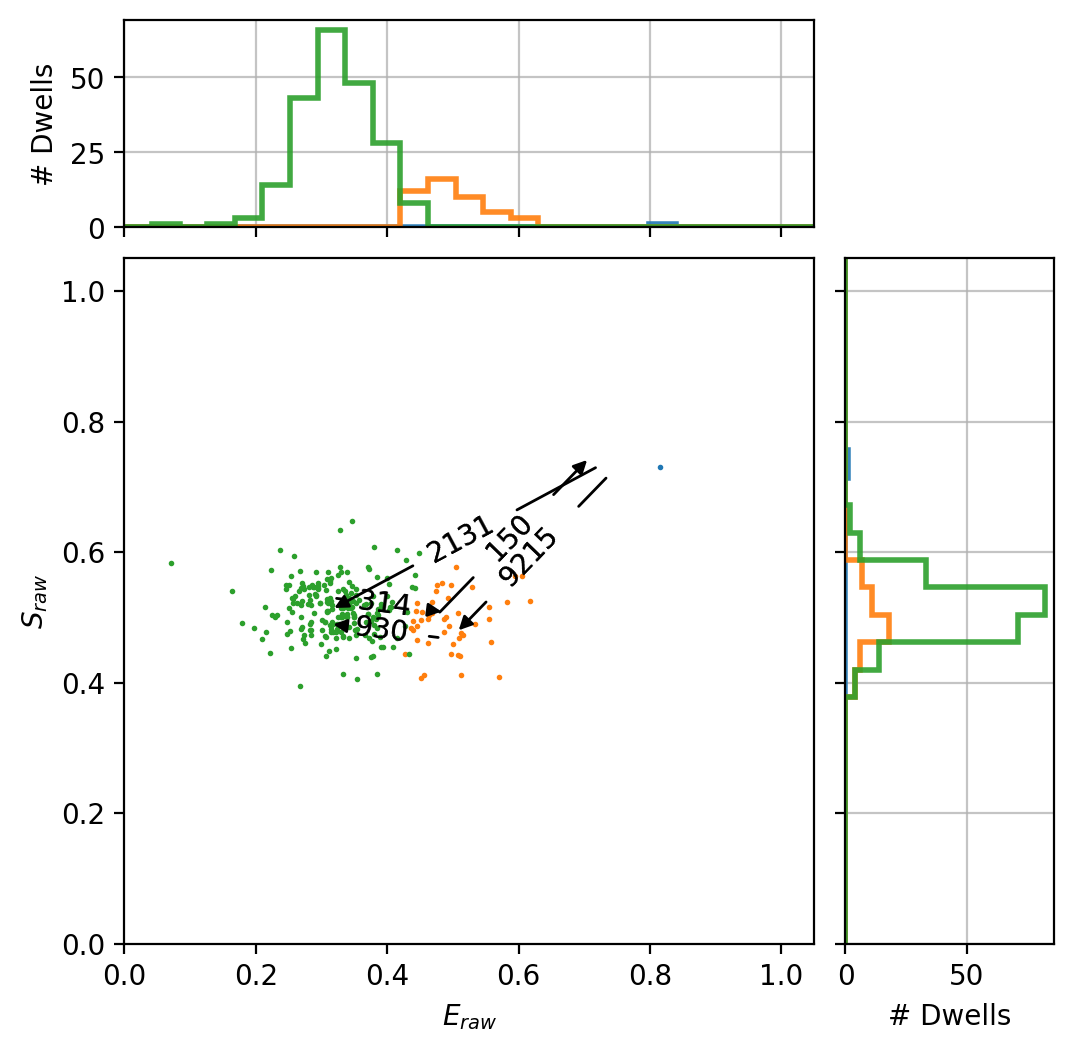

In [22]:
model_id = 2

fig, ax= plt.subplots(figsize=(5, 4))
bhm.dwell_ES_scatter(mp_sel.models[model_id], s = 2)
bhm.trans_arrow_ES(mp_sel.models[model_id], min_rate=0)
#bhm.axline_E(mp.models[model_id])
bhm.scatter_ES(mp_sel.models[model_id], s = 50, color = "r")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_3state_h2mm_puri_lightblinking.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_3state_h2mm_puri_lightblinking.svg", bbox_inches = 'tight')
plt.show()

bhm.burst_ES_scatter(mp_sel.models[model_id], flatten_dynamics=True, s = 1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()


code_repo.dwell_ES_histprojection(mp_sel.models[model_id], plot_ranges=[[0, 1.05], [0, 1.05]])
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_3state_puri_h2mm_ES_scatter_hist_severeblinking.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_3state_puri_h2mm_ES_scatter_hist_severeblinking.svg", bbox_inches = 'tight')



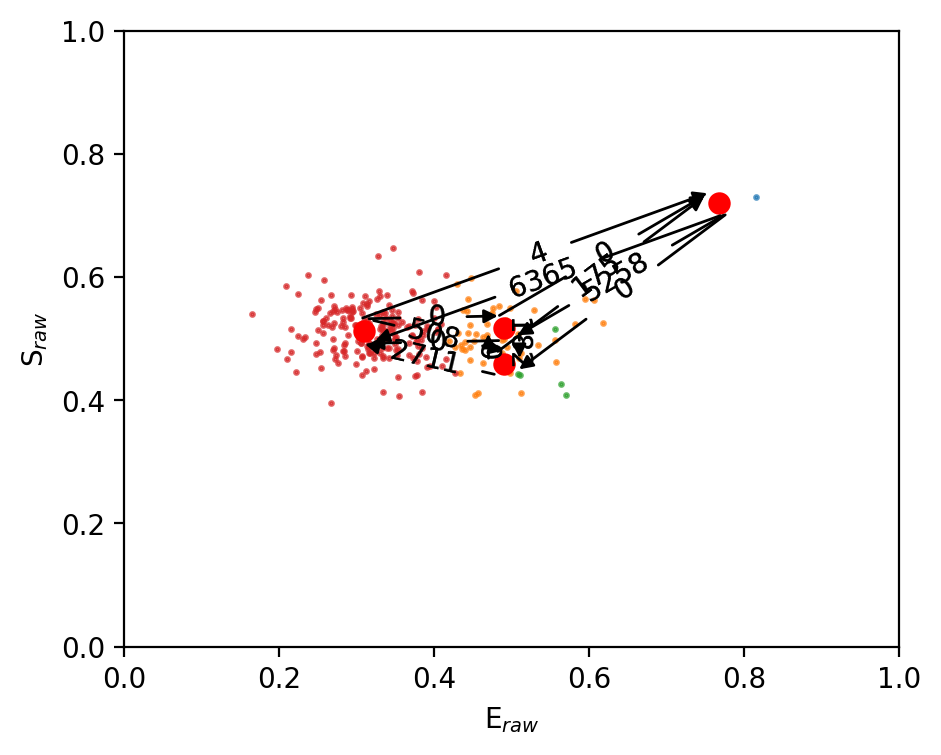

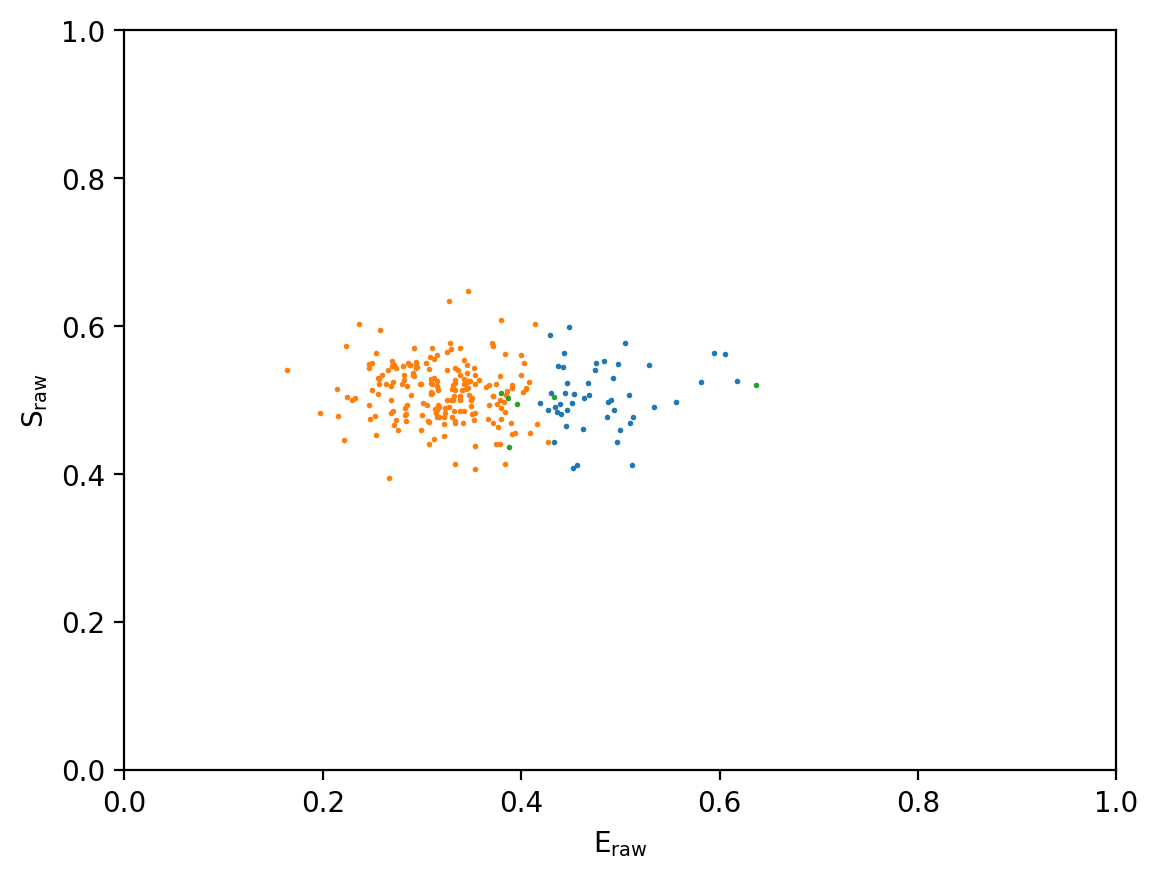

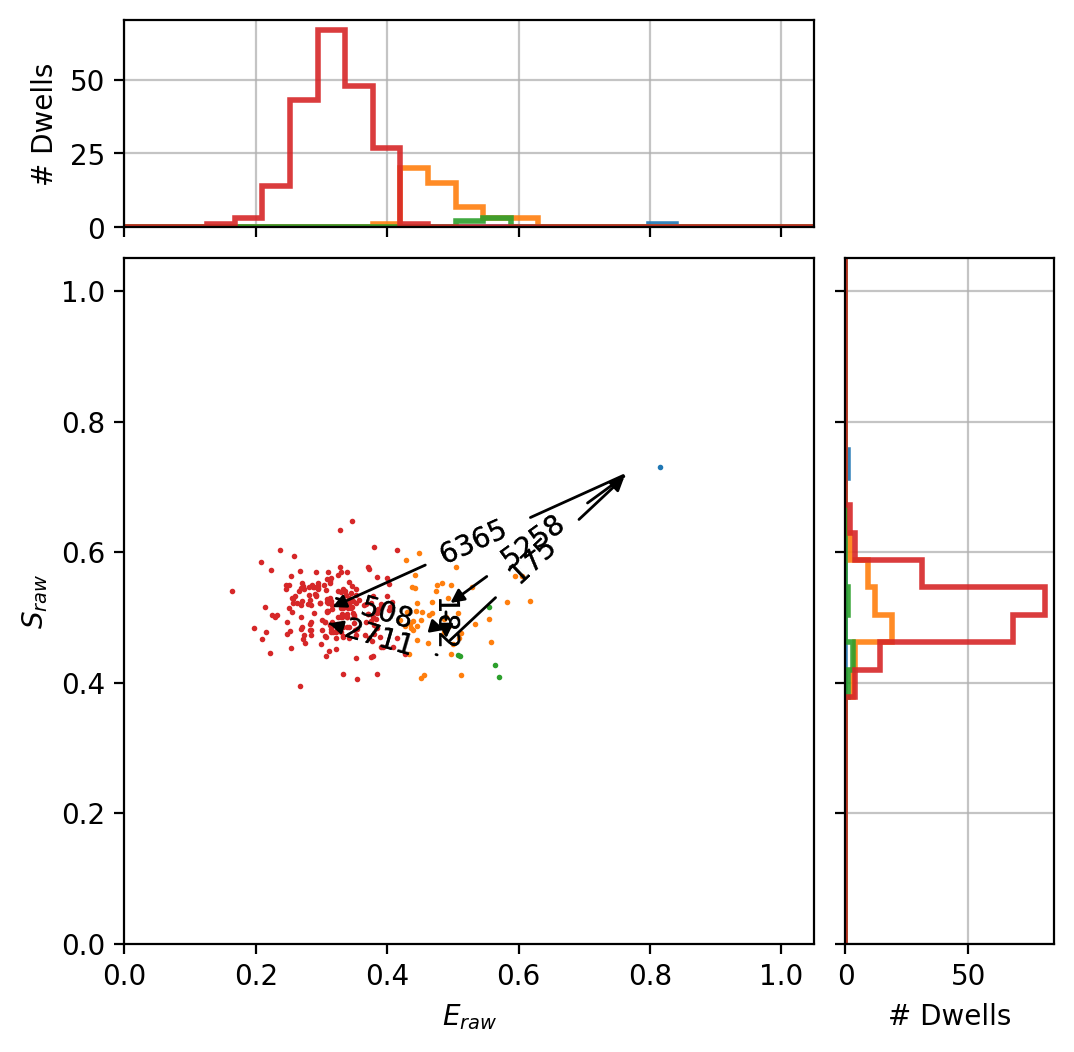

In [24]:
model_id = 3

fig, ax= plt.subplots(figsize=(5, 4))
bhm.dwell_ES_scatter(mp_sel.models[model_id], s = 2)
bhm.trans_arrow_ES(mp_sel.models[model_id], min_rate=0)
#bhm.axline_E(mp.models[model_id])
bhm.scatter_ES(mp_sel.models[model_id], s = 50, color = "r")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_4state_h2mm_puri_lightblinking.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_4state_h2mm_puri_lightblinking.svg", bbox_inches = 'tight')
plt.show()

bhm.burst_ES_scatter(mp_sel.models[model_id], flatten_dynamics=True, s = 1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()


code_repo.dwell_ES_histprojection(mp_sel.models[model_id], plot_ranges=[[0, 1.05], [0, 1.05]])
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_4state_puri_h2mm_ES_scatter_hist_severeblinking.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_4state_puri_h2mm_ES_scatter_hist_severeblinking.svg", bbox_inches = 'tight')
plt.show()


## Comparison of the blinking, with the cleaned, and without blinking

In [21]:
d_nonblink = frb.loader.photon_hdf5(
        "smFRET_aa3ff9_E30E50_2states_taus_2.5ms1.0ms0.0ms.h5"
)
d_nonblink.add(D_ON=(100, 2100), A_ON=(2150, 4095))
frb.loader.alex_apply_period(d_nonblink)

d_nonblink.calc_bg(fun=frb.bg.exp_fit, time_s = 60, F_bg=1.7)
d_nonblink.burst_search(F=7, m = 10)
d_nonblink.fuse_bursts(ms = 0)

d_nonblinks = d_nonblink.select_bursts(frb.select_bursts.size, add_naa = False, th1=60)
d_nonblinks = d_nonblinks.select_bursts(frb.select_bursts.naa, th1=40)


        The current file lacks the alternation period definition.
        You will need to manually add this info using:

          d.add(D_ON=D_ON, A_ON=A_ON)

        where `d` is a Data object and D_ON/A_ON is a tuple with start/stop
        values defining the D/A excitation excitation period. Values are in
        raw timestamps units.
        


# Total photons (after ALEX selection):     4,408,813
#  D  photons in D+A excitation periods:    1,933,908
#  A  photons in D+A excitation periods:    2,474,905
# D+A photons in  D  excitation period:     2,222,879
# D+A photons in  A  excitation period:     2,185,934

 - Calculating BG rates ... get bg th arrays
Channel 0
[DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
 - - - - - CHANNEL  1 - - - - 
 --> END Fused 5993 bursts (34.2%, 11 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]


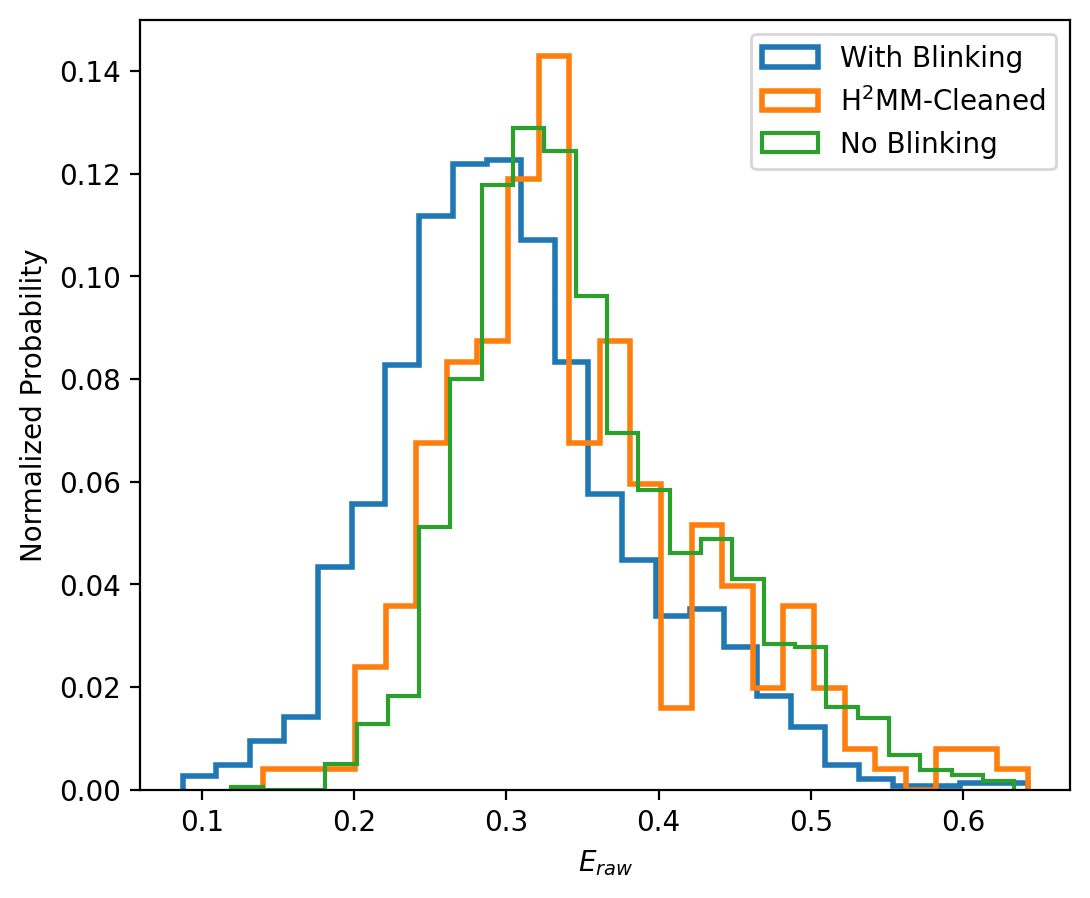

In [27]:
# Weights for hist normalization
weights_ds = np.ones_like(ds.E[0]) / len(ds.E[0])
weights_ds_sel = np.ones_like(ds_sel.E[0]) / len(ds_sel.E[0])
weights_d_nonblinks = np.ones_like(d_nonblinks.E[0]) / len(d_nonblinks.E[0])

plt.figure(figsize=(6, 5))
plt.hist(ds.E[0], bins = 25, histtype = u"step", lw = 2, weights = weights_ds, label = "With Blinking")
plt.hist(ds_sel.E[0], bins = 25, histtype = u"step", lw = 2, weights = weights_ds_sel, label = r"H$^2$MM-Cleaned")
plt.hist(d_nonblinks.E[0], bins = 25, histtype = u"step", lw = 1.5, weights = weights_d_nonblinks, label = "No Blinking")
#plt.suptitle("Dynamic Two-State Simulation - Severe Blinking")
plt.legend(loc = 'best')
plt.xlabel(r'$E_{raw}$')
plt.ylabel(r'Normalized Probability')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_comparison_E_severeblinking.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_comparison_E_severeblinking.svg", bbox_inches = 'tight')
plt.show()

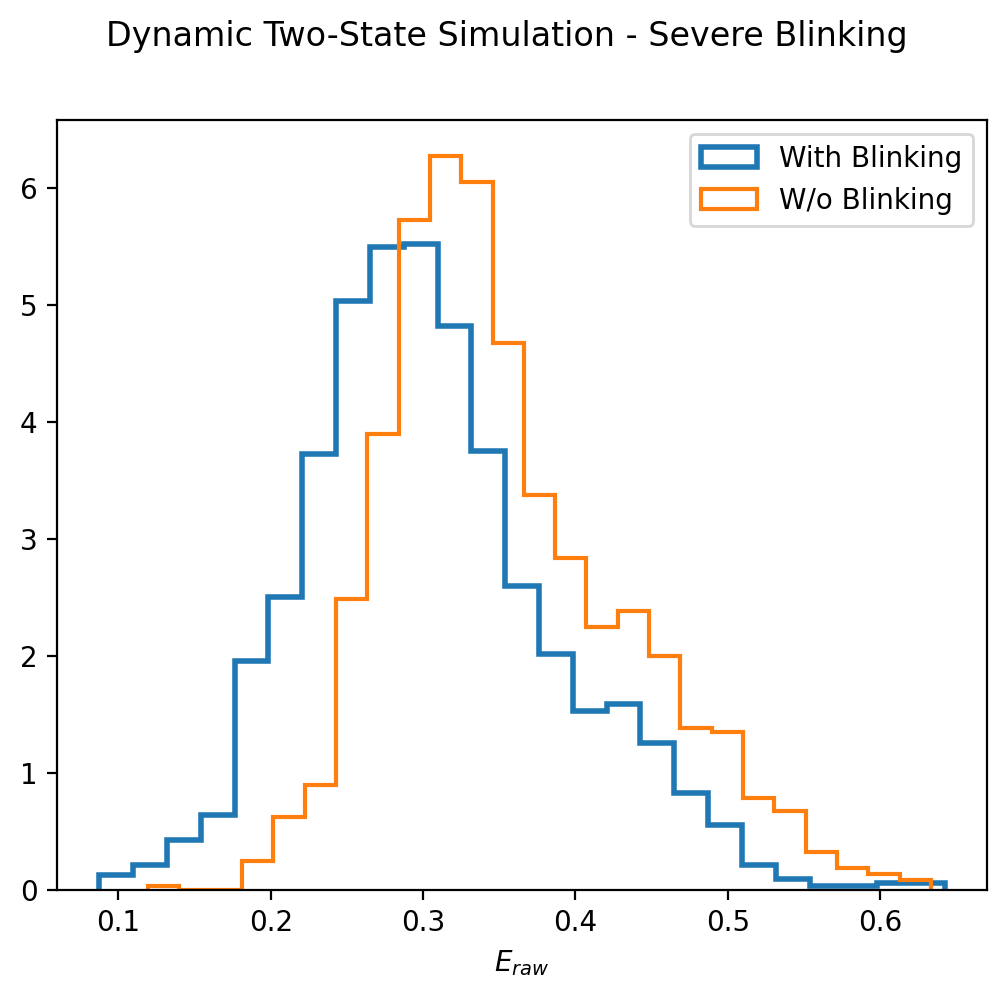

In [28]:
plt.figure(figsize=(6, 5))
plt.hist(ds.E[0], bins = 25, histtype = u"step", lw = 2, density = True, label = "With Blinking")
plt.hist(d_nonblinks.E[0], bins = 25, histtype = u"step", lw = 1.5,density = True, label = "W/o Blinking")
plt.suptitle("Dynamic Two-State Simulation - Severe Blinking")
plt.legend(loc = 'best')
plt.xlabel(r'$E_{raw}$')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_comparison_E_severeblinking_vs_groundtruth.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_comparison_E_severeblinking_vs_groundtruth.svg", bbox_inches = 'tight')
plt.show()

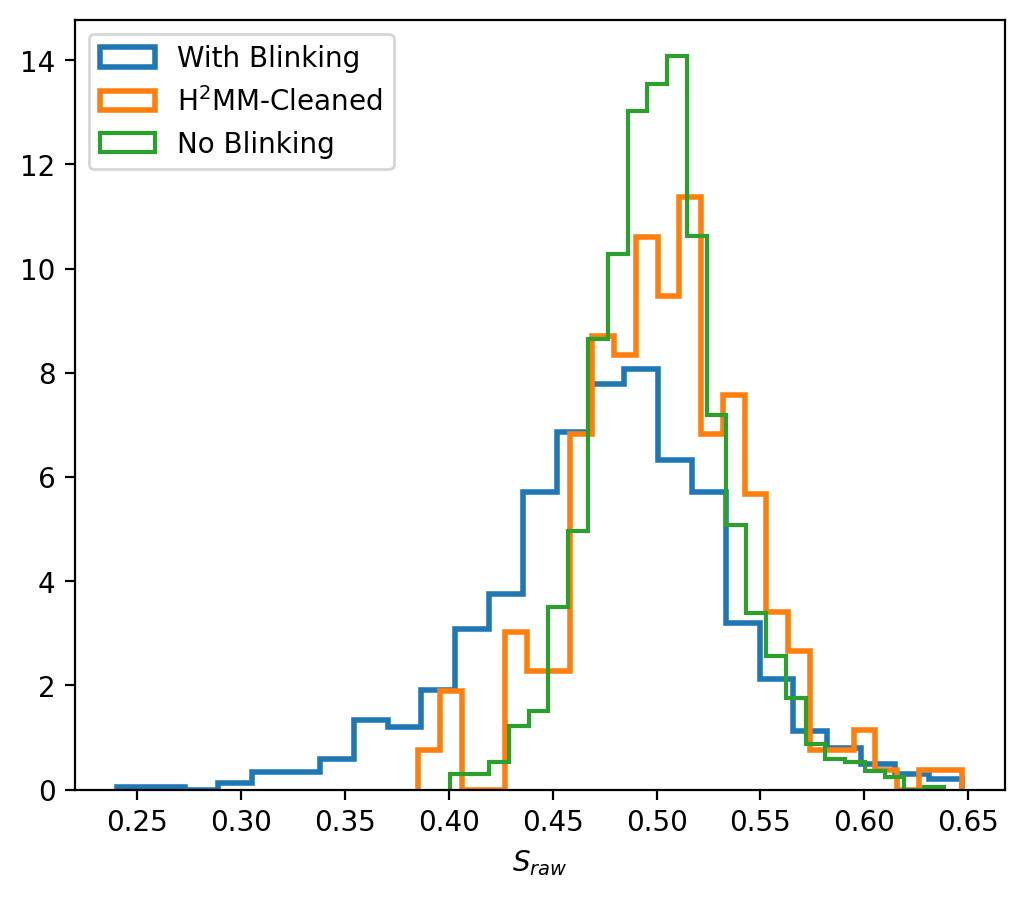

In [29]:
plt.figure(figsize=(6, 5))
plt.hist(ds.S[0], bins = 25, histtype = u"step", lw = 2, density = True, label = "With Blinking")
plt.hist(ds_sel.S[0], bins = 25, histtype = u"step", lw = 2,density = True, label = r"H$^2$MM-Cleaned")
plt.hist(d_nonblinks.S[0], bins = 25, histtype = u"step", lw = 1.5,density = True, label = "No Blinking")
#plt.suptitle("Dynamic Two-State Simulation - Severe Blinking")
plt.legend(loc = 'best')
plt.xlabel(r'$S_{raw}$')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_comparison_S_severeblinking.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_comparison_S_severeblinking.svg", bbox_inches = 'tight')
plt.show()

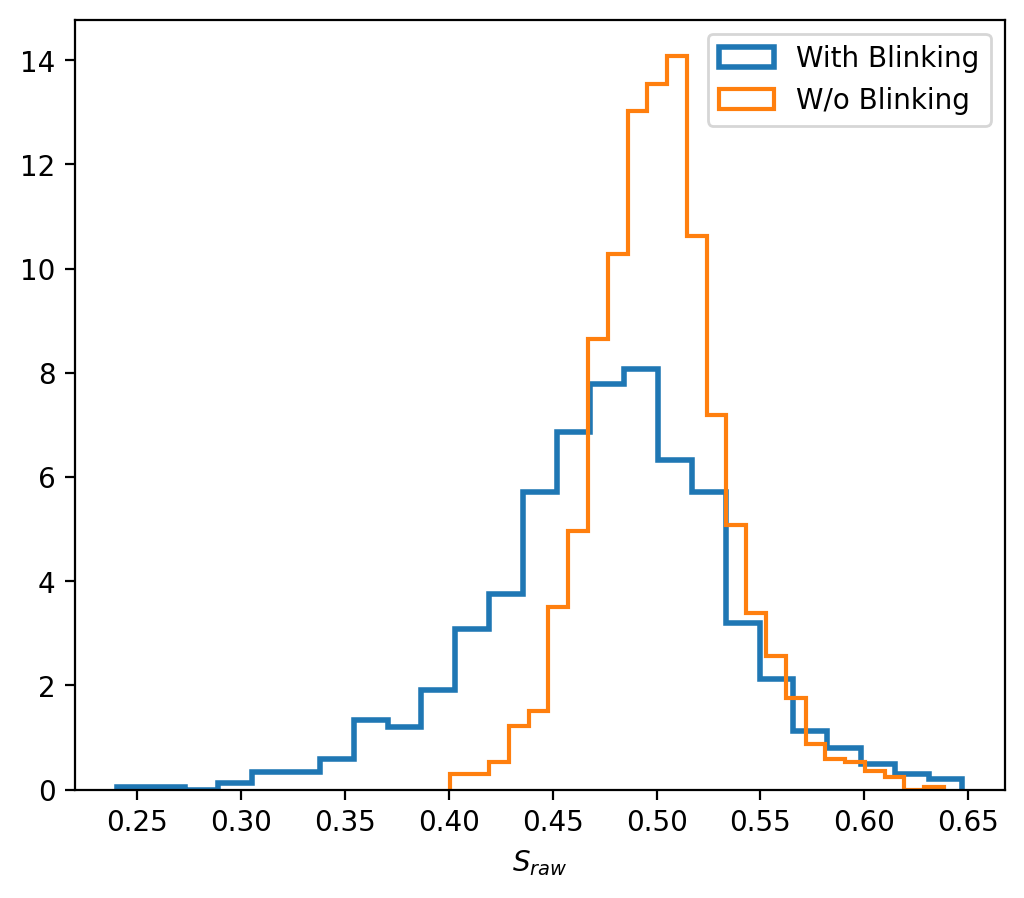

In [30]:
plt.figure(figsize=(6, 5))
plt.hist(ds.S[0], bins = 25, histtype = u"step", lw = 2, density = True, label = "With Blinking")
plt.hist(d_nonblinks.S[0], bins = 25, histtype = u"step", lw = 1.5,density = True, label = "W/o Blinking")
#plt.suptitle("Dynamic Two-State Simulation - Severe Blinking")
plt.legend(loc = 'best')
plt.xlabel(r'$S_{raw}$')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_comparison_S_severeblinking_vs_groundtruth.png", dpi = 600, bbox_inches = 'tight')
plt.savefig("Check_PIE_Sim_smFRET_aa3ff9_E30E50_2states_taus_1000.0ms1000.0ms0.0ms_blink_0.5ms3.0ms1.0ms/dynamic_comparison_S_severeblinking_vs_groundtruth.svg", bbox_inches = 'tight')
plt.show()